In [1]:
# Importo las librerias
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from sklearn import linear_model
import re

## Desafío DOS.
##### Introducción.
En este desafío desarrollaremos y evaluaremos el rendimiento de varios modelos para analizar su potencia y su poder de generalización,sobre datos referentes al mercado inmobiliario proporcionados por Properatti.

##### Modificación de datos y preprocesamiento previo.
Para continuar con el desafio número dos y desarrollar un modelo que nos permita inferir el precio por metro cuadrado, decidimos crear nuevas features con el objetivo de aumentar la cantidad de variables explicativas y lograr un buen ajuste para el modelo. Para ello utilizamos la técnica Regex para extraer información de la columna "description" y dummificar ciertas variables como las amenities.

## 1. Analisis Exploratorio de Datos del Dataset Limpio ##

In [2]:
path = 'df_final.csv'
data = pd.read_csv(path,sep=',')
data.shape

(71827, 25)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71827 entries, 0 to 71826
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             71827 non-null  int64  
 1   Unnamed: 0.1           71827 non-null  int64  
 2   price_aprox_usd        71827 non-null  float64
 3   surface_total_in_m2    71827 non-null  float64
 4   surface_covered_in_m2  71827 non-null  float64
 5   Provincia              71827 non-null  object 
 6   Barrio                 71827 non-null  object 
 7   propiedad_PH           71827 non-null  int64  
 8   propiedad_apartment    71827 non-null  int64  
 9   propiedad_house        71827 non-null  int64  
 10  propiedad_store        71827 non-null  int64  
 11  precio_M2_total        71827 non-null  float64
 12  precio_M2_covered      71827 non-null  float64
 13  Comuna                 71827 non-null  object 
 14  Region                 71827 non-null  object 
 15  ro

In [4]:
#Eliminamos estas columnas porque son redundantes y no aportan mucho.
data.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [5]:
data.columns

Index(['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'Provincia', 'Barrio', 'propiedad_PH', 'propiedad_apartment',
       'propiedad_house', 'propiedad_store', 'precio_M2_total',
       'precio_M2_covered', 'Comuna', 'Region', 'rooms', 'garage_dummie',
       'property_type', 'description', 'Pileta_dummie', 'Gym_dummie',
       'Luz_dummie', 'Patio_dummie', 'geonames_id', 'lat-lon'],
      dtype='object')

In [6]:
# Ranking de cantidad de ocurrencias por zona
data.Provincia.value_counts().sort_values(ascending=False)

Capital Federal                 24590
Bs.As. G.B.A. Zona Norte        18040
Buenos Aires Costa Atlántica     7016
Bs.As. G.B.A. Zona Sur           6714
Bs.As. G.B.A. Zona Oeste         5057
Santa Fe                         4461
Córdoba                          3188
Buenos Aires Interior            1156
Corrientes                        308
Mendoza                           279
Neuquén                           214
Misiones                          164
Río Negro                         162
Tucumán                           109
San Luis                          100
Entre Ríos                         79
Salta                              58
Chubut                             39
Tierra Del Fuego                   23
Chaco                              22
La Pampa                           14
Catamarca                          13
Santa Cruz                          8
Jujuy                               5
Formosa                             4
San Juan                            3
Santiago Del

### 1.1. Analisis a nivel pais ###

In [7]:
# Creamos el dataset con las principales variables a utilizar en las visualizaciones a nivel pais y por zona
data_resumen = data.loc[:,['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'Provincia', 'precio_M2_total','precio_M2_covered','property_type','rooms']]

data_rooms_notnull = data_resumen.rooms.notnull()


data_ordenada = data_resumen[data_rooms_notnull]

In [8]:
# Tabla de correlaciones a nivel pais
data_ordenada.corr()

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,precio_M2_total,precio_M2_covered,rooms
price_aprox_usd,1.000000,0.207988,0.534227,0.253126,0.320848,0.008857
surface_total_in_m2,0.207988,1.000000,0.333706,-0.146743,-0.063318,0.000456
surface_covered_in_m2,0.534227,0.333706,1.000000,-0.121878,-0.106766,0.012162
precio_M2_total,0.253126,-0.146743,-0.121878,1.000000,0.903575,0.012160
precio_M2_covered,0.320848,-0.063318,-0.106766,0.903575,1.000000,0.008964
rooms,0.008857,0.000456,0.012162,0.012160,0.008964,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

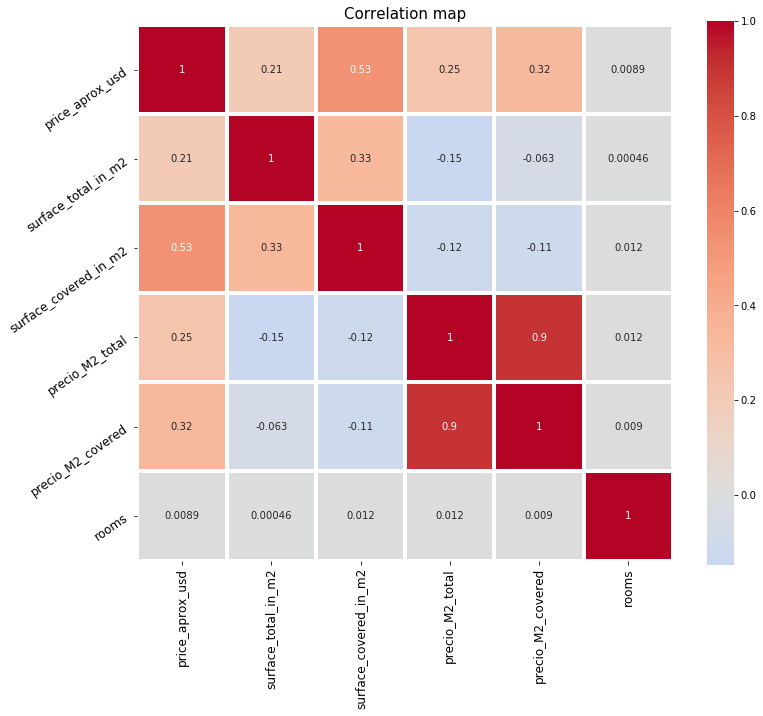

In [9]:
# Graficos de correlacion
corr = data_ordenada.corr()

plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, annot=True, center=0, square=True, linewidths=3, cmap = 'coolwarm')

plt.title('Correlation map', size = 15)
plt.xticks(size =12)
plt.yticks(size =12,rotation=35)

In [10]:
#corr = data_ordenada.corr()
#mask = np.zeros(corr.shape, dtype=bool)
#mask[np.triu_indices(len(mask))] = True
#plt.figure(figsize=(15,10))
#ax = sns.heatmap(
    #corr, annot=True, 
    #vmin=-1, vmax=1, center=0,
    #square=True, linewidths=1, mask=mask, cmap = 'coolwarm')

#plt.title('Correlation map', size = 25)
#plt.xticks(size =15, rotation=45)
#plt.yticks(size =15,rotation=45)


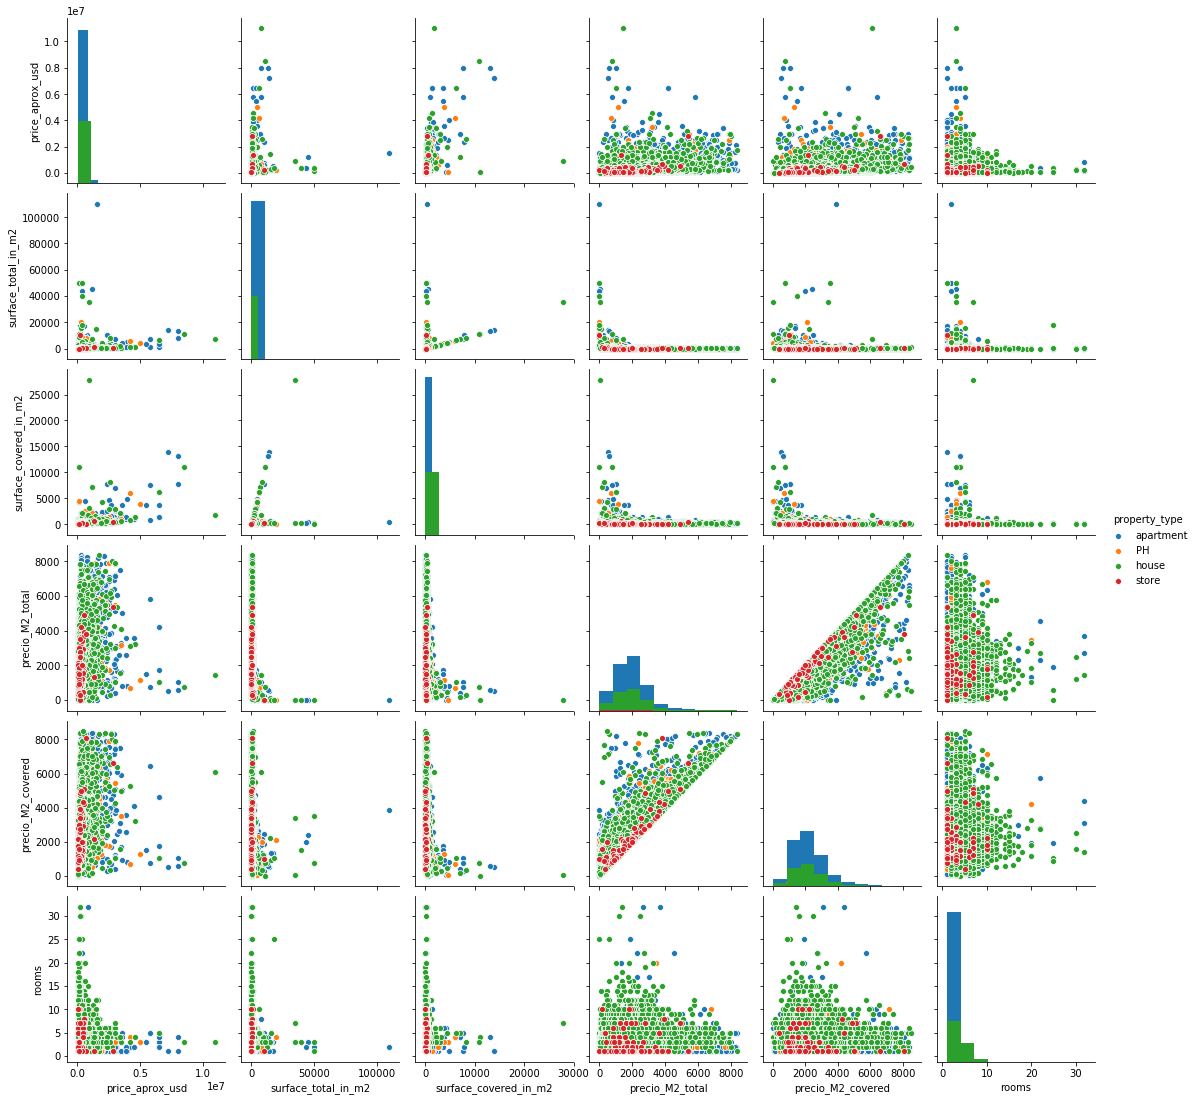

In [11]:
# Visualizo los datos del df filtrado usando pair plot
sns.pairplot(data_ordenada, hue="property_type", diag_kind="hist");

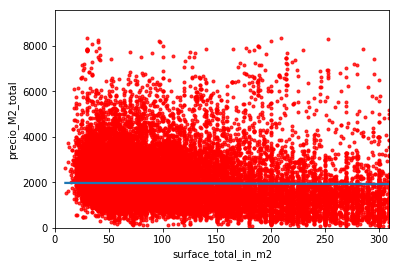

In [12]:
# Grafico regplot la relacion entre el precio por m2 total y superficie total 
sns.regplot(data_ordenada.surface_total_in_m2, data_ordenada.precio_M2_total, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(bottom=0);

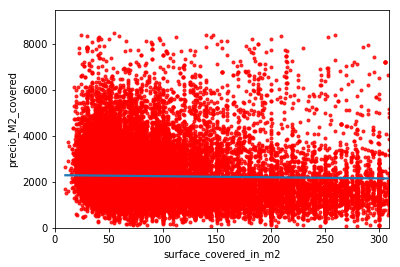

In [13]:
# Grafico regplot la relacion entre el precio por m2 total y superficie total 
sns.regplot(data_ordenada.surface_covered_in_m2, data_ordenada.precio_M2_covered, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(bottom=0);

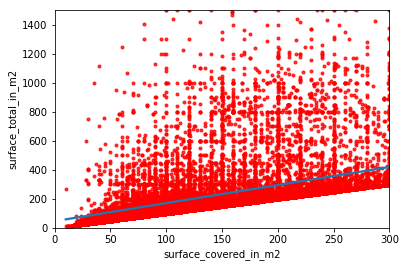

In [14]:
## Regplot entre superficie Cubierta y Total
sns.regplot(data_ordenada.surface_covered_in_m2, data_ordenada.surface_total_in_m2, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,300)
plt.ylim(0,1500);

**Aca vemos la colinealidad entre sup total y cubierta** que  justifica el valor mostrado en el heatmap (**0.9**)
Esto puede generar problemas entonces a la hora de realizar un modelo vamos a tener que tener en cuenta
- Si utilizamos la variable m2_totales o m2_cubiertos
- En base a laa descicion de arriba, camabiar la variable target (precio_por_m2_total o precio_por_m2_cubierto) para ver por cual sup calculamos el precio del m2

## 1.2. Analisis por zona ##

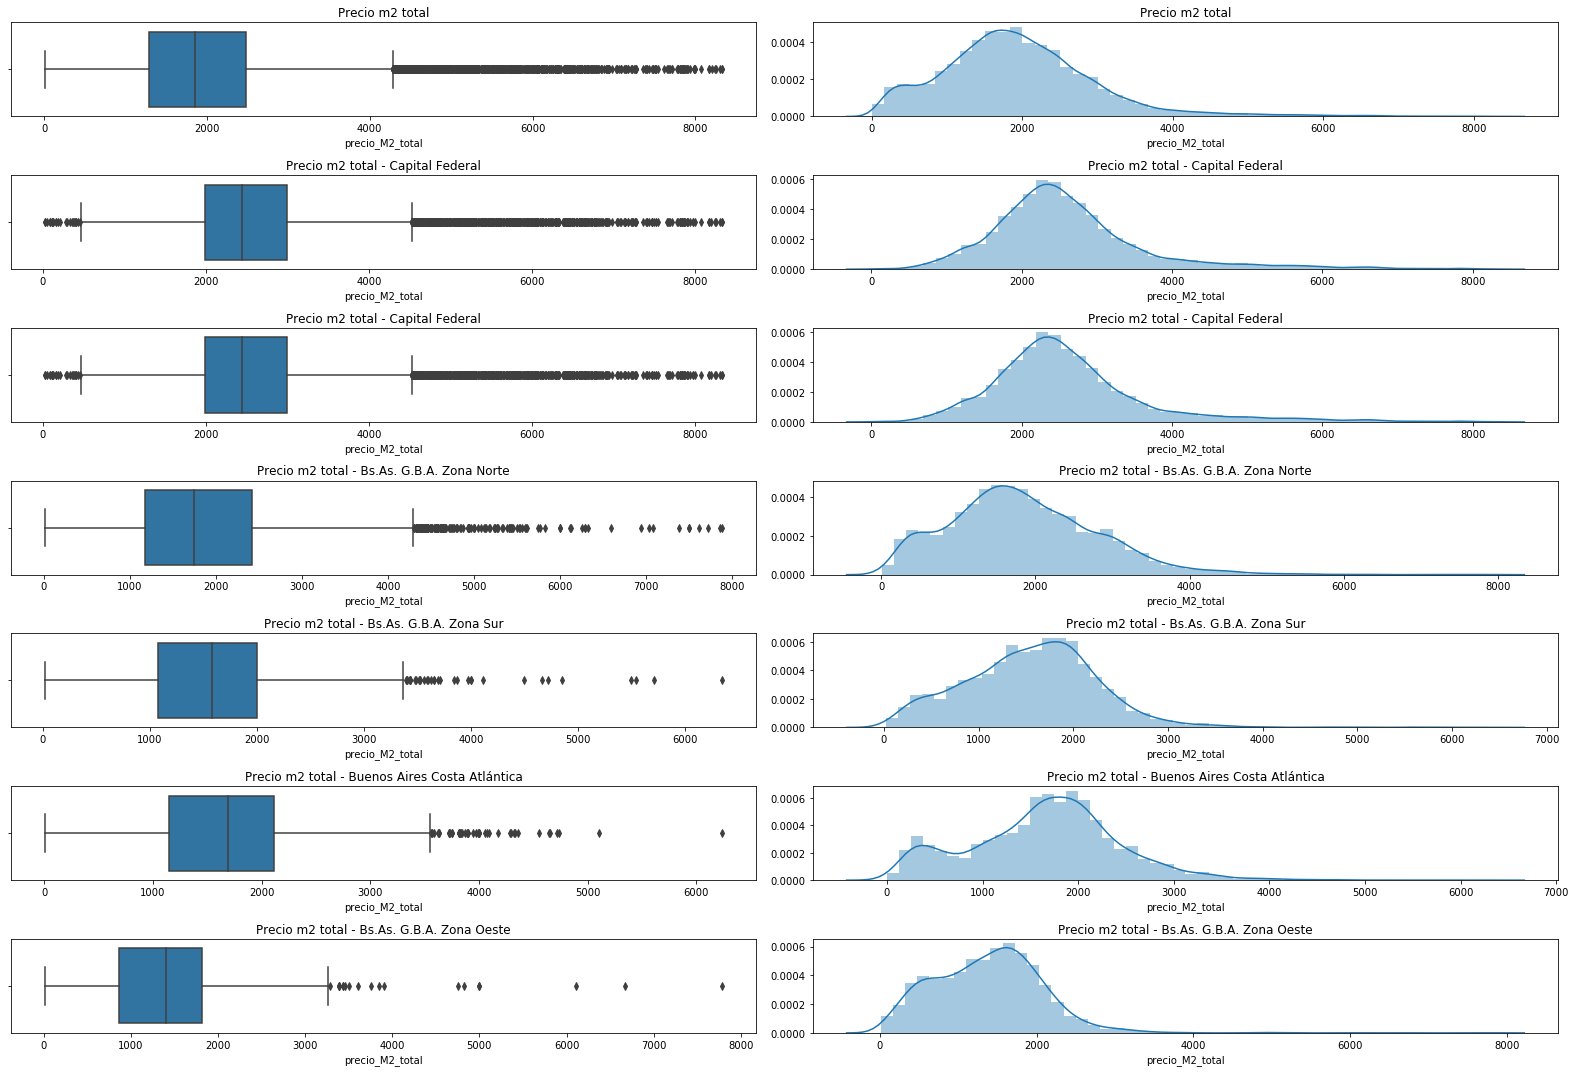

In [15]:
fig, axs = plt.subplots(7,2,figsize=(22,15))
# 22 15
#Total
sns.boxplot(x = "precio_M2_total", data = data_ordenada, ax=axs[0,0])
axs[0,0].set_title("Precio m2 total")
sns.distplot(data_ordenada.precio_M2_total, ax=axs[0,1])
axs[0,1].set_title("Precio m2 total")

#Capital Federal
sns.boxplot(x = "precio_M2_total", data = data_ordenada[data_ordenada.Provincia == "Capital Federal"], ax=axs[1,0])
axs[1,0].set_title("Precio m2 total - Capital Federal")
sns.distplot(data_ordenada[data_ordenada.Provincia == "Capital Federal"].precio_M2_total, ax=axs[1,1])
axs[1,1].set_title("Precio m2 total - Capital Federal")

#Capital Federal
sns.boxplot(x = "precio_M2_total", data = data_ordenada[data_ordenada.Provincia == "Capital Federal"], ax=axs[2,0])
axs[2,0].set_title("Precio m2 total - Capital Federal")
sns.distplot(data_ordenada[data_ordenada.Provincia == "Capital Federal"].precio_M2_total, ax=axs[2,1])
axs[2,1].set_title("Precio m2 total - Capital Federal")

#Bs.As. G.B.A. Zona Norte
sns.boxplot(x = "precio_M2_total", data = data_ordenada[data_ordenada.Provincia == "Bs.As. G.B.A. Zona Norte"], ax=axs[3,0])
axs[3,0].set_title("Precio m2 total - Bs.As. G.B.A. Zona Norte")
sns.distplot(data_ordenada[data_ordenada.Provincia == "Bs.As. G.B.A. Zona Norte"].precio_M2_total, ax=axs[3,1])
axs[3,1].set_title("Precio m2 total - Bs.As. G.B.A. Zona Norte")

#Bs.As. G.B.A. Zona Sur
sns.boxplot(x = "precio_M2_total", data = data_ordenada[data_ordenada.Provincia == "Bs.As. G.B.A. Zona Sur"], ax=axs[4,0])
axs[4,0].set_title("Precio m2 total - Bs.As. G.B.A. Zona Sur")
sns.distplot(data_ordenada[data_ordenada.Provincia == "Bs.As. G.B.A. Zona Sur"].precio_M2_total, ax=axs[4,1])
axs[4,1].set_title("Precio m2 total - Bs.As. G.B.A. Zona Sur")

#Buenos Aires Costa Atlántica
sns.boxplot(x = "precio_M2_total", data = data_ordenada[data_ordenada.Provincia == "Buenos Aires Costa Atlántica"], ax=axs[5,0])
axs[5,0].set_title("Precio m2 total - Buenos Aires Costa Atlántica")
sns.distplot(data_ordenada[data_ordenada.Provincia == "Buenos Aires Costa Atlántica"].precio_M2_total, ax=axs[5,1])
axs[5,1].set_title("Precio m2 total - Buenos Aires Costa Atlántica")

#Bs.As. G.B.A. Zona Oeste
sns.boxplot(x = "precio_M2_total", data = data_ordenada[data_ordenada.Provincia == "Bs.As. G.B.A. Zona Oeste"], ax=axs[6,0])
axs[6,0].set_title("Precio m2 total - Bs.As. G.B.A. Zona Oeste")
sns.distplot(data_ordenada[data_ordenada.Provincia == "Bs.As. G.B.A. Zona Oeste"].precio_M2_total, ax=axs[6,1])
axs[6,1].set_title("Precio m2 total - Bs.As. G.B.A. Zona Oeste")

fig.tight_layout()

### 1.2.1. Capital Federal ###

In [16]:
mask_caba = (data_ordenada.Provincia == 'Capital Federal')
df_caba = data_ordenada.loc[mask_caba,:]
df_caba.shape

(13992, 8)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

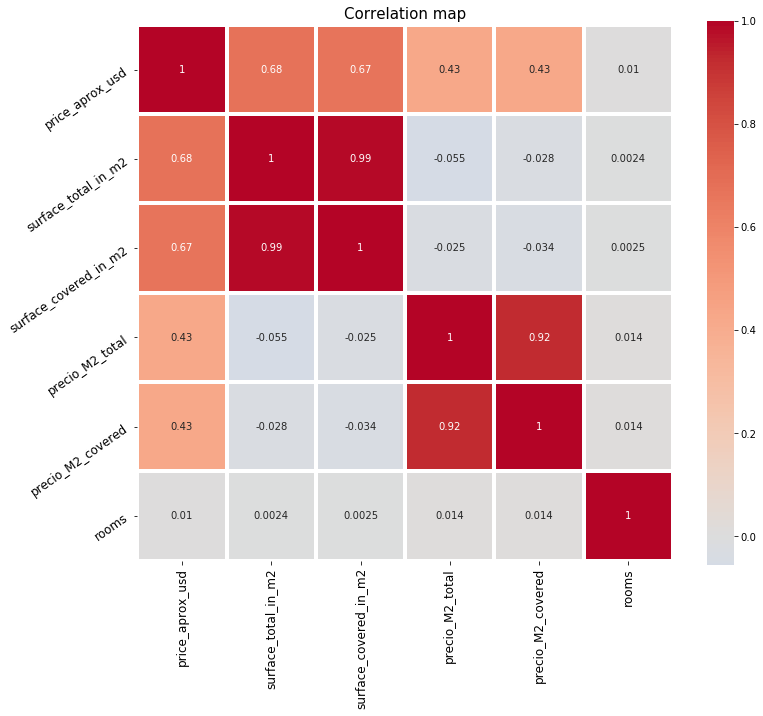

In [17]:
# Graficos de correlacion en CABA
corr = df_caba.corr()

plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, annot=True, center=0, square=True, linewidths=3, cmap = 'coolwarm')

plt.title('Correlation map', size = 15)
plt.xticks(size =12)
plt.yticks(size =12,rotation=35)

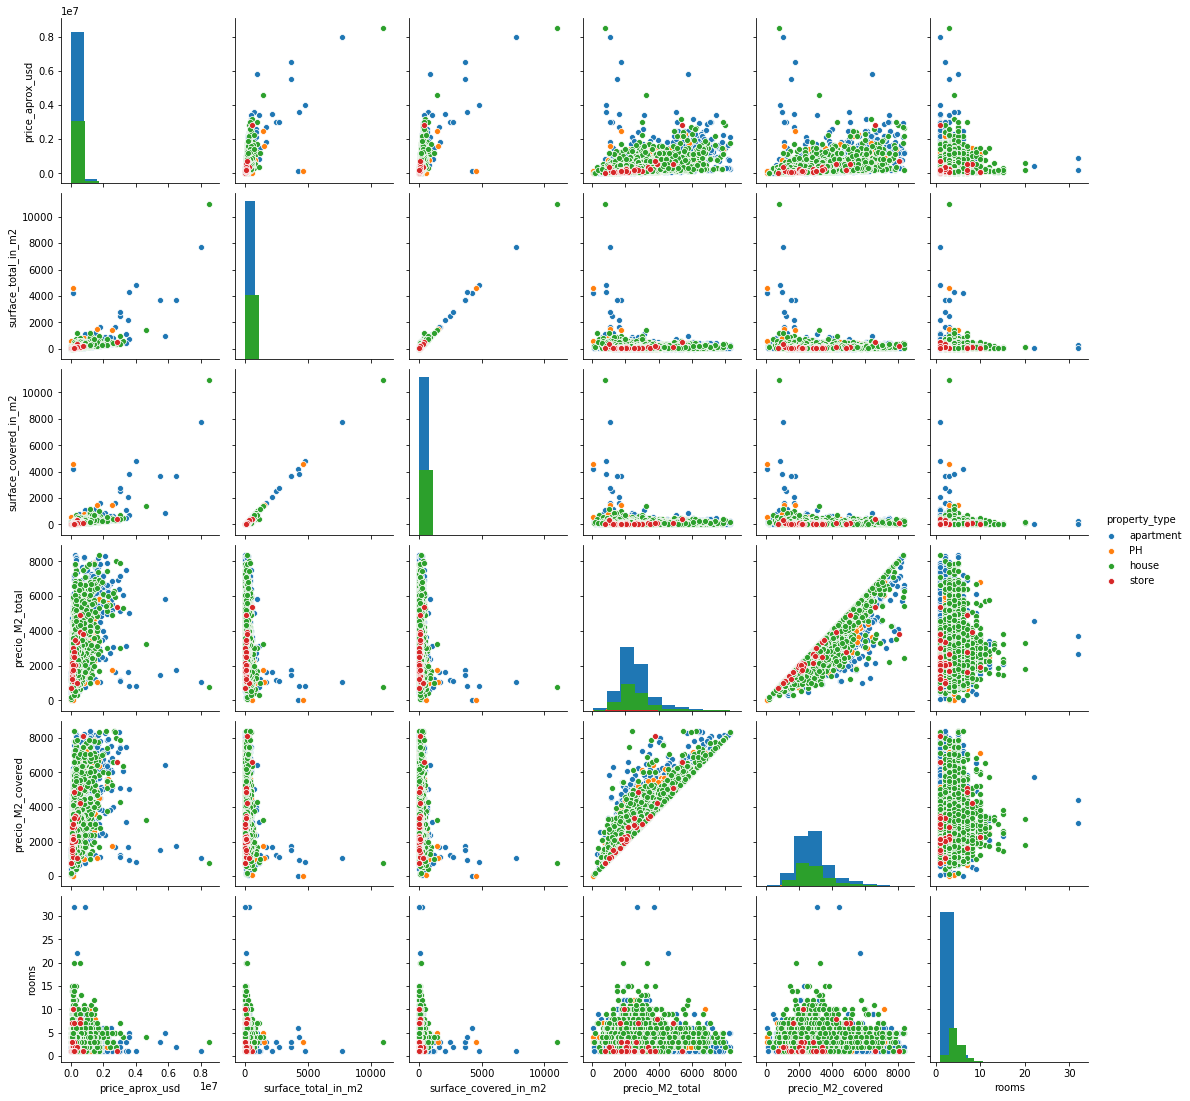

In [18]:
# Visualizamos los datos de CABA usando pair plot
sns.pairplot(df_caba, hue="property_type", diag_kind="hist");

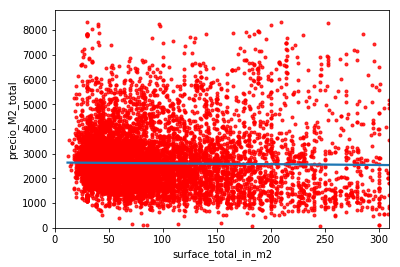

In [19]:
# Grafico regplot la relacion entre el precio por m2 total y superficie total 
sns.regplot(df_caba.surface_total_in_m2, df_caba.precio_M2_total, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(bottom=0);

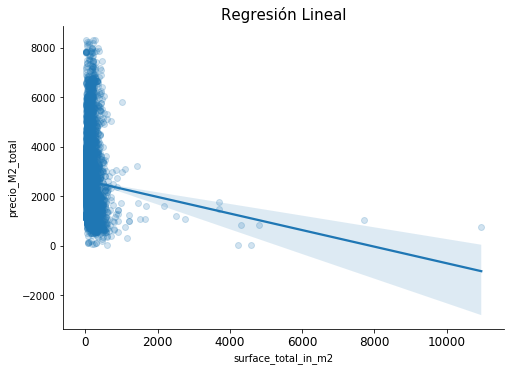

In [20]:
sns.lmplot(x = 'surface_total_in_m2', y = 'precio_M2_total',data=df_caba, aspect=1.45, scatter_kws={'alpha':0.2})
plt.title("Regresión Lineal",size=15)
plt.xticks(size=12)
plt.xticks(size=12);

In [21]:
# Graficos de correlacion
#plt.figure(figsize=(15,10))
#sns.heatmap(data_ordenada.corr(),annot=True,cmap='coolwarm');

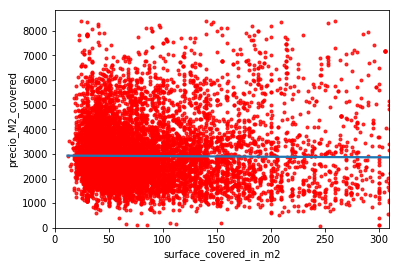

In [22]:
# Grafico regplot la relacion entre el precio por m2 cubierta y superficie cubierta
sns.regplot(df_caba.surface_covered_in_m2, df_caba.precio_M2_covered, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(bottom=0);

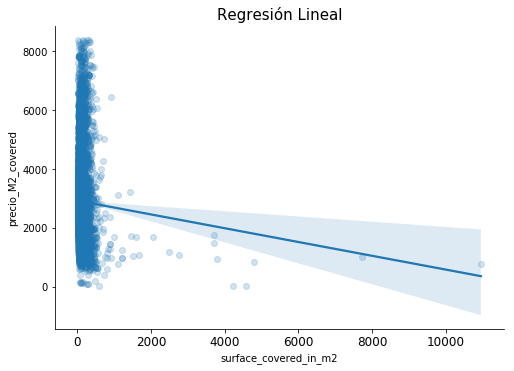

In [23]:
sns.lmplot(x = 'surface_covered_in_m2', y = 'precio_M2_covered',data=df_caba, aspect=1.45, scatter_kws={'alpha':0.2})
plt.title("Regresión Lineal",size=15)
plt.xticks(size=12)
plt.xticks(size=12);

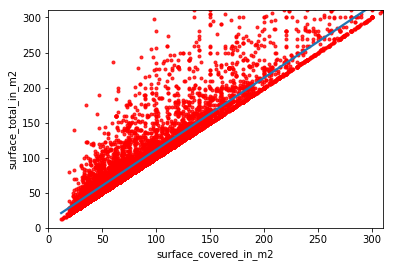

In [24]:
## Regplot entre superficie Cubierta y Total
sns.regplot(df_caba.surface_covered_in_m2, df_caba.surface_total_in_m2, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(0,310);

### 1.2.2. Bs.As. G.B.A. Zona Norte ###

In [25]:
mask_gba_zn = (data_ordenada.Provincia == 'Bs.As. G.B.A. Zona Norte')
df_gba_zn = data_ordenada.loc[mask_gba_zn,:]
df_gba_zn.shape

(10848, 8)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

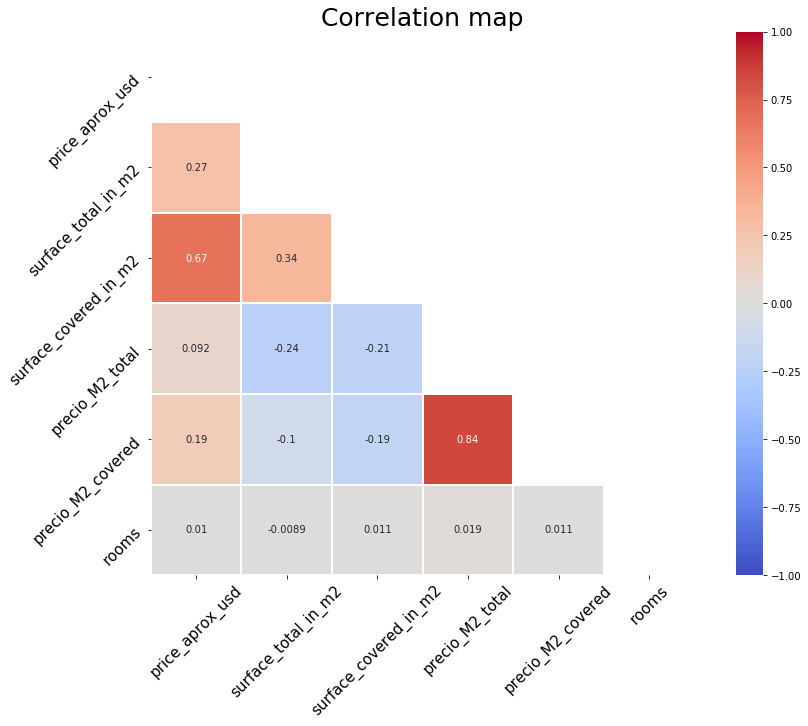

In [26]:
# Graficos de correlacion GBA Zona Norte
corr = df_gba_zn.corr()

mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

plt.figure(figsize=(15,10))
ax = sns.heatmap(
    corr, annot=True, 
    vmin=-1, vmax=1, center=0,
    square=True, linewidths=1, mask=mask, cmap = 'coolwarm'
)


plt.title('Correlation map', size = 25)
plt.xticks(size =15, rotation=45)
plt.yticks(size =15,rotation=45)

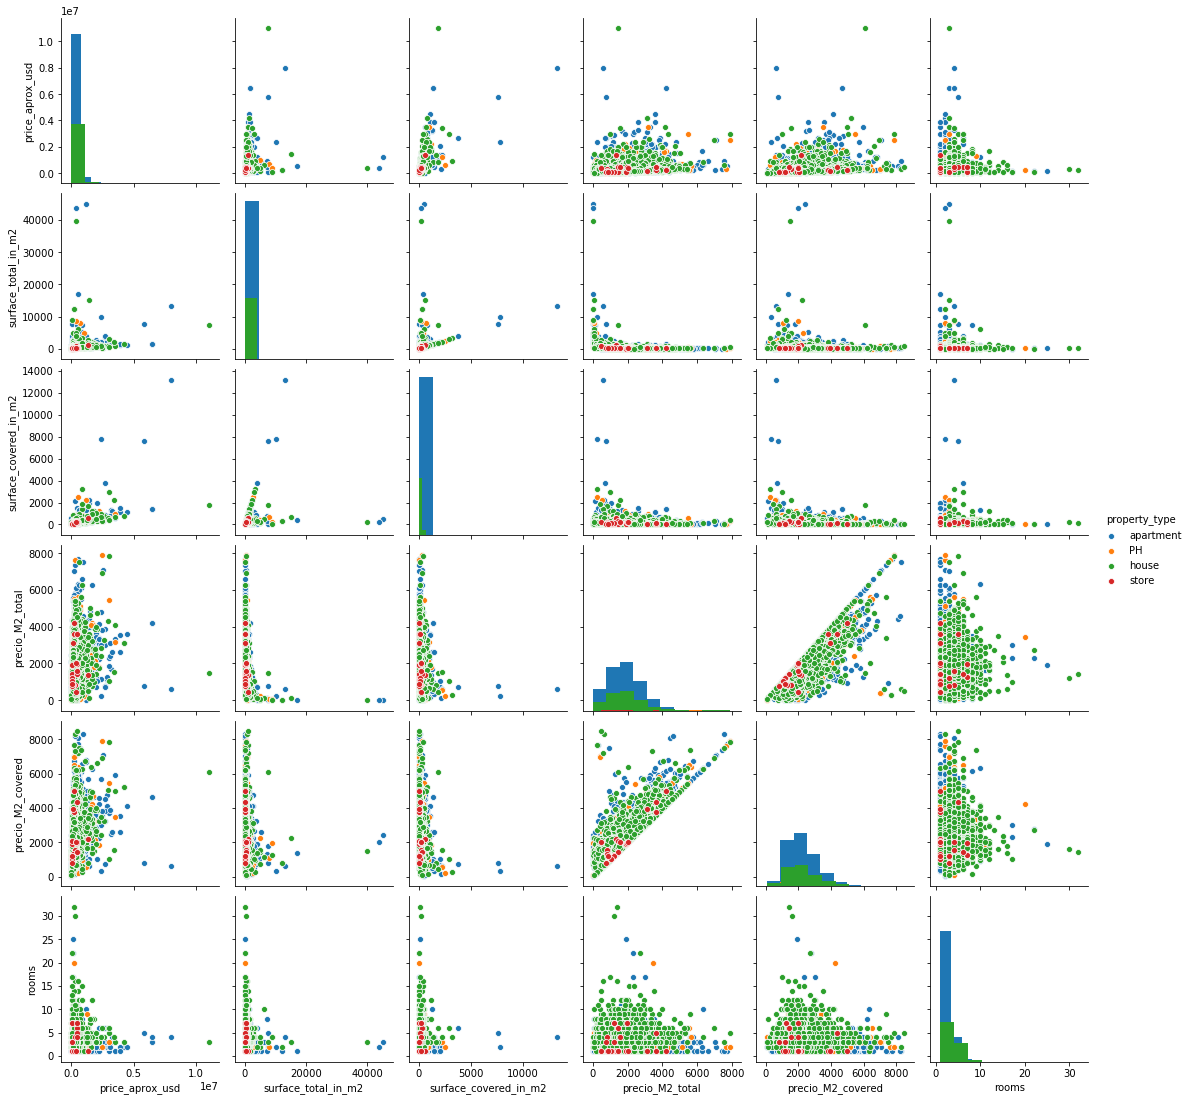

In [27]:
# Visualizamos los datos de GBA Zona Norte usando pair plot
sns.pairplot(df_gba_zn, hue="property_type", diag_kind="hist");

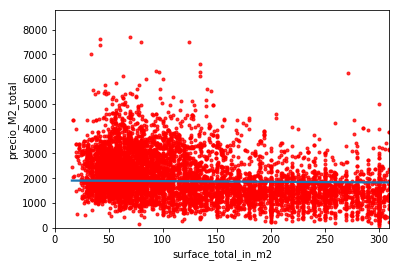

In [28]:
# Grafico regplot la relacion entre el precio por m2 total y superficie total 
sns.regplot(df_gba_zn.surface_total_in_m2, df_gba_zn.precio_M2_total, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(bottom=0);

(0, 7000)

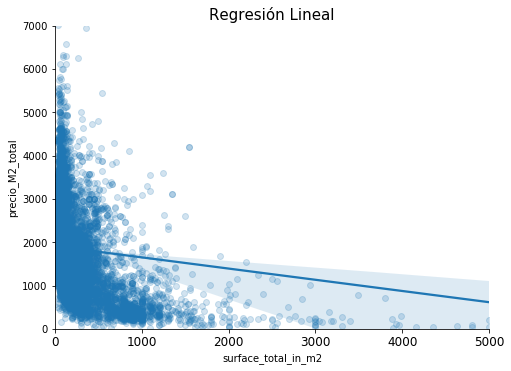

In [29]:
sns.lmplot(x = 'surface_total_in_m2', y = 'precio_M2_total',data=df_gba_zn, aspect=1.45, scatter_kws={'alpha':0.2})
plt.title("Regresión Lineal",size=15)
plt.xticks(size=12)
plt.xticks(size=12);
plt.xlim(0,5000)
plt.ylim(0,7000)

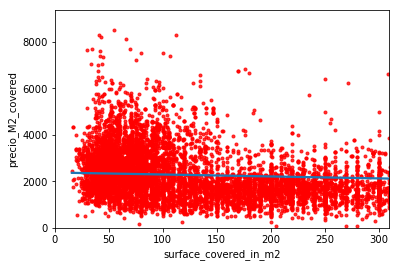

In [30]:
# Grafico regplot la relacion entre el precio por m2 cubierta y superficie cubierta
sns.regplot(df_gba_zn.surface_covered_in_m2, df_gba_zn.precio_M2_covered, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(bottom=0);

(0, 6000)

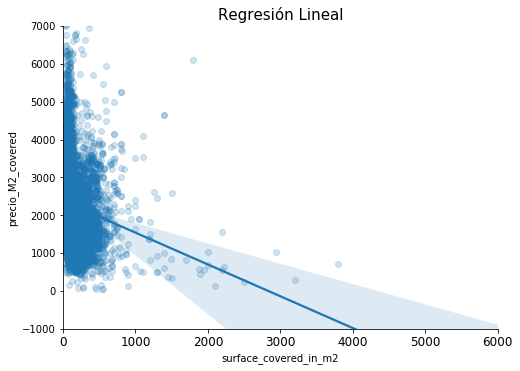

In [31]:
sns.lmplot(x = 'surface_covered_in_m2', y = 'precio_M2_covered',data=df_gba_zn, aspect=1.45, scatter_kws={'alpha':0.2})
plt.title("Regresión Lineal",size=15)
plt.xticks(size=12)
plt.xticks(size=12);
plt.ylim(-1000,7000);
plt.xlim(0,6000)

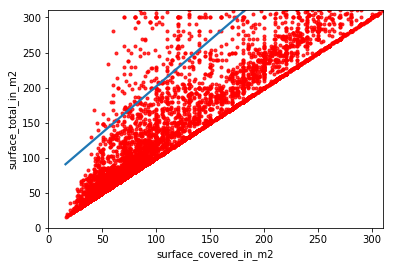

In [32]:
## Regplot entre superficie Cubierta y Total
sns.regplot(df_gba_zn.surface_covered_in_m2, df_gba_zn.surface_total_in_m2, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(0,310);

### 1.2.3. Buenos Aires Costa Atlántica  ###

In [33]:
mask_baires_ca = (data_ordenada.Provincia == 'Buenos Aires Costa Atlántica')
df_baires_ca = data_ordenada.loc[mask_baires_ca,:]
df_baires_ca.shape

(4298, 8)

In [33]:
# Graficos de correlacion
corr = df_baires_ca.corr()

plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, annot=True, center=0, square=True, linewidths=3, cmap = 'coolwarm')

plt.title('Correlation map', size = 15)
plt.xticks(size =12)
plt.yticks(size =12,rotation=35)

NameError: name 'df_baires_ca' is not defined

In [ ]:
# Visualizamos los datos de de Baires Costa Atlantica usando pair plot
sns.pairplot(df_baires_ca, hue="property_type", diag_kind="hist");

In [ ]:
# Grafico regplot la relacion entre el precio por m2 total y superficie total 
sns.regplot(df_baires_ca.surface_total_in_m2, df_baires_ca.precio_M2_total, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(bottom=0);

In [ ]:
# Grafico regplot la relacion entre el precio por m2 cubierta y superficie cubierta
sns.regplot(df_baires_ca.surface_covered_in_m2, df_baires_ca.precio_M2_covered, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(bottom=0);

In [ ]:
## Regplot entre superficie Cubierta y Total
sns.regplot(df_baires_ca.surface_covered_in_m2, df_baires_ca.surface_total_in_m2, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(0,310);

### 1.2.4. Bs.As. G.B.A. Zona Sur ###

In [35]:
mask_gba_zs = (data_ordenada.Provincia == 'Bs.As. G.B.A. Zona Sur')
df_gba_zs = data_ordenada.loc[mask_gba_zs,:]
df_gba_zs.shape

(4017, 8)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

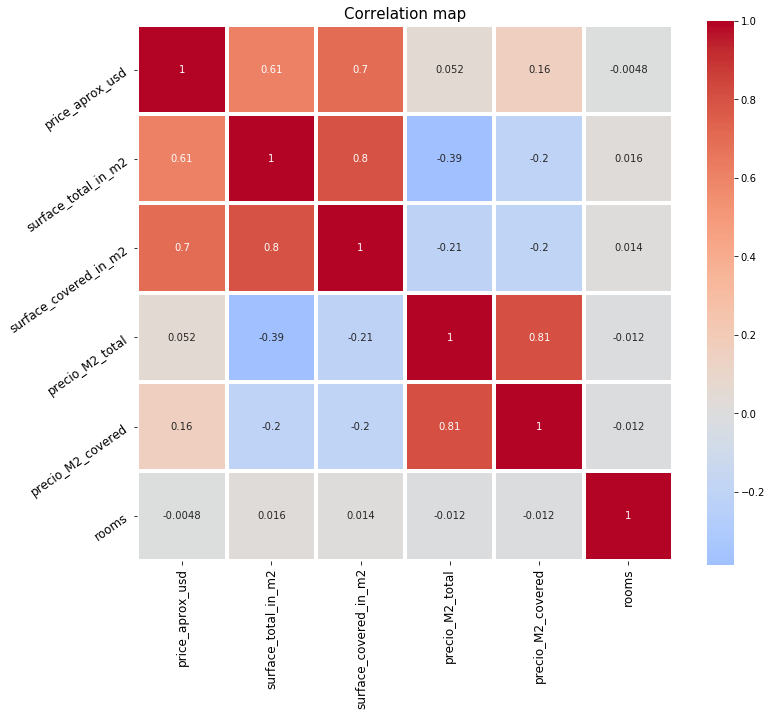

In [36]:
# Graficos de correlacion
corr = df_gba_zs.corr()

plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, annot=True, center=0, square=True, linewidths=3, cmap = 'coolwarm')

plt.title('Correlation map', size = 15)
plt.xticks(size =12)
plt.yticks(size =12,rotation=35)

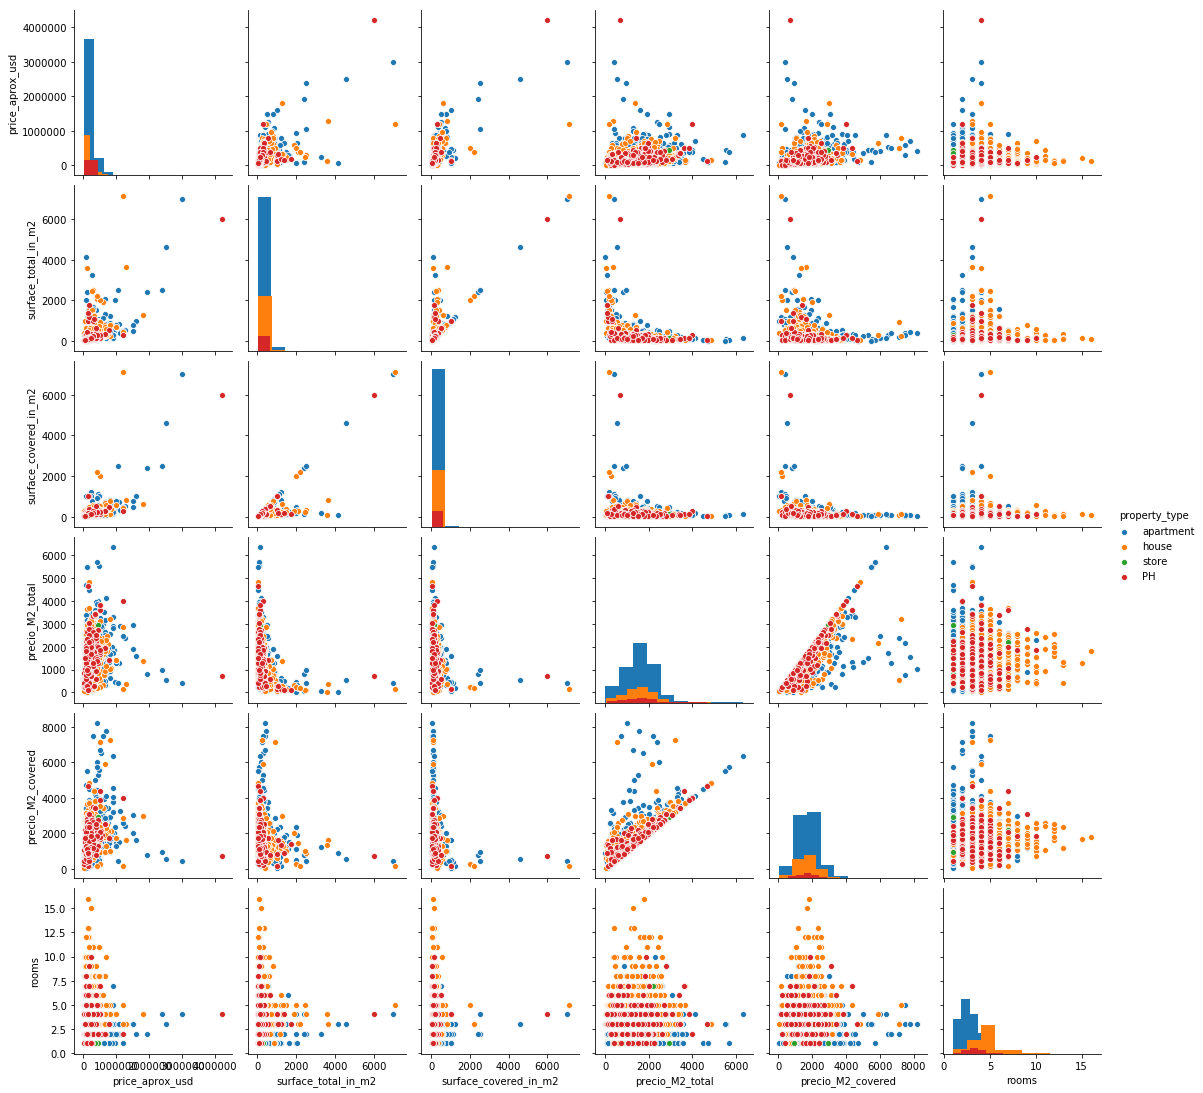

In [37]:
# Visualizamos los datos de GBA Zona Sur usando pair plot
sns.pairplot(df_gba_zs, hue="property_type", diag_kind="hist");

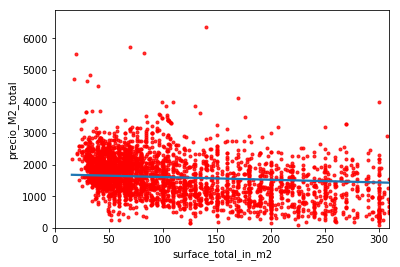

In [38]:
# Grafico regplot la relacion entre el precio por m2 total y superficie total 
sns.regplot(df_gba_zs.surface_total_in_m2, df_gba_zs.precio_M2_total, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(bottom=0);

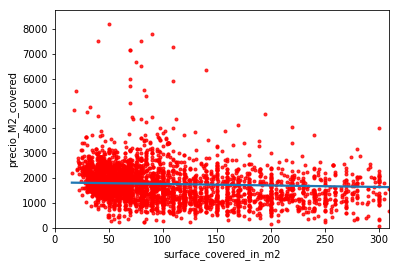

In [39]:
# Grafico regplot la relacion entre el precio por m2 cubierta y superficie cubierta
sns.regplot(df_gba_zs.surface_covered_in_m2, df_gba_zs.precio_M2_covered, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(bottom=0);

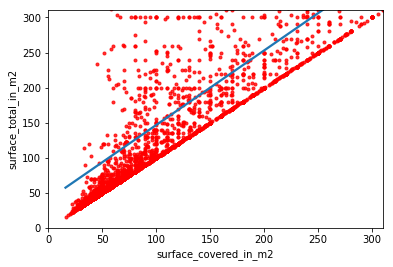

In [40]:
## Regplot entre superficie Cubierta y Total
sns.regplot(df_gba_zs.surface_covered_in_m2, df_gba_zs.surface_total_in_m2, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(0,310);

### 1.2.5. Bs.As. G.B.A. Zona Oeste ###

In [41]:
mask_gba_zo = (data_ordenada.Provincia == 'Bs.As. G.B.A. Zona Oeste')
df_gba_zo = data_ordenada.loc[mask_gba_zo,:]
df_gba_zo.shape

(3220, 8)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

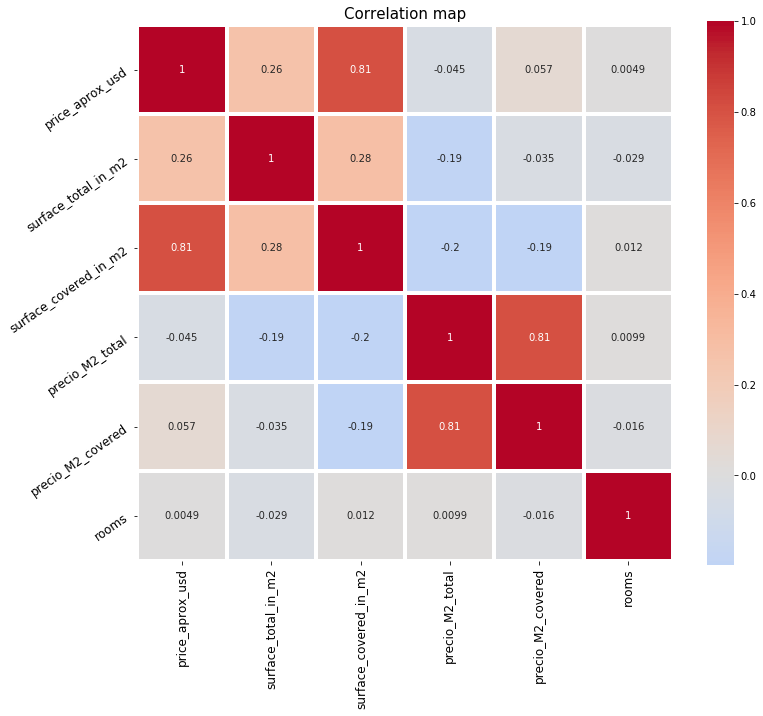

In [42]:
# Graficos de correlacion
corr = df_gba_zo.corr()

plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, annot=True, center=0, square=True, linewidths=3, cmap = 'coolwarm')

plt.title('Correlation map', size = 15)
plt.xticks(size =12)
plt.yticks(size =12,rotation=35)

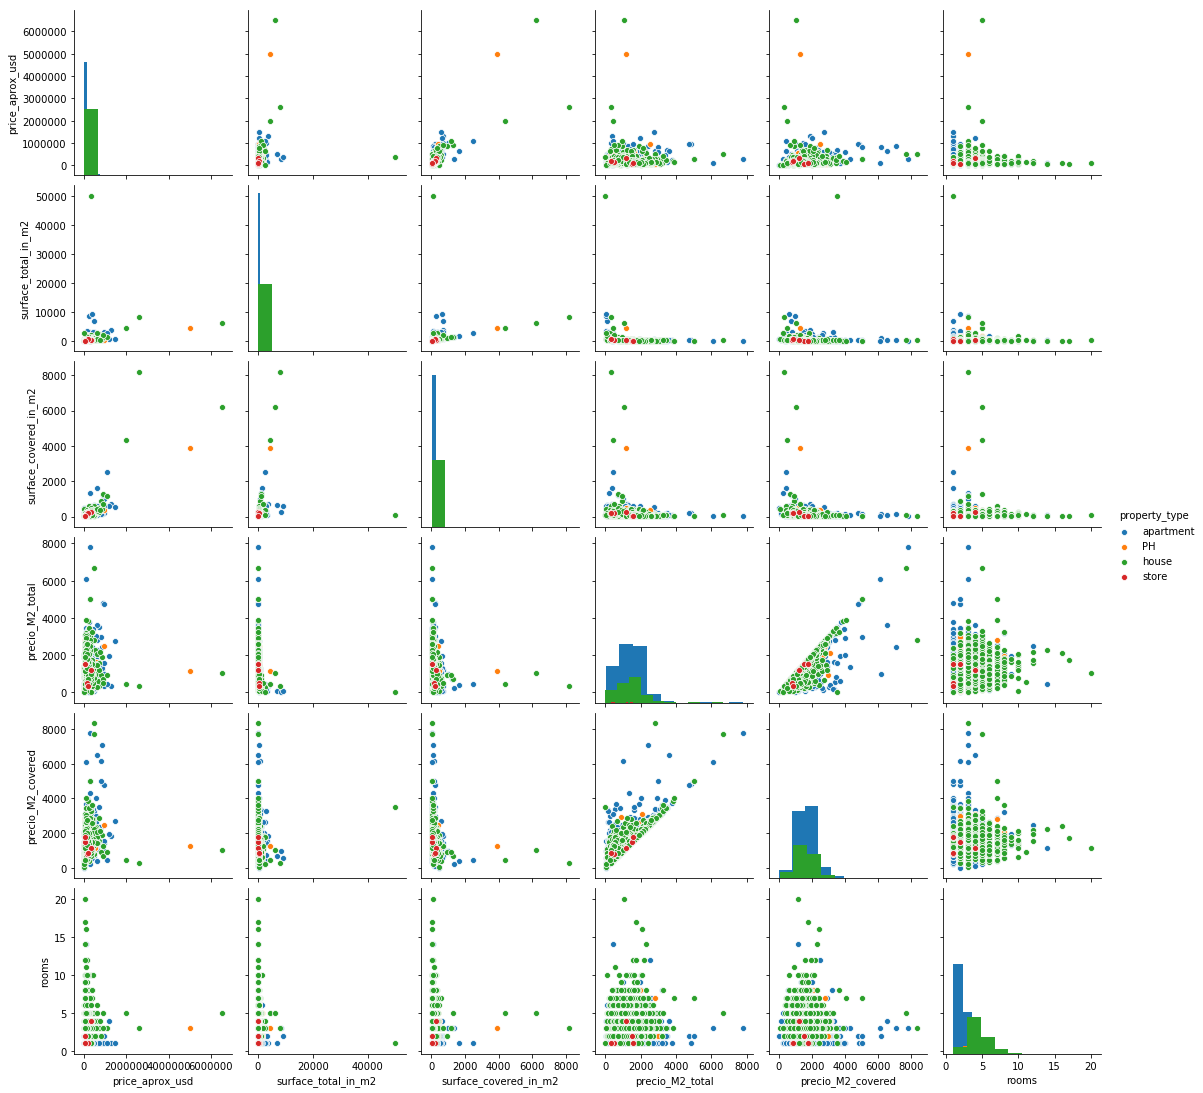

In [43]:
# Visualizamos los datos de GBA Zona Oeste usando pair plot
sns.pairplot(df_gba_zo, hue="property_type", diag_kind="hist");

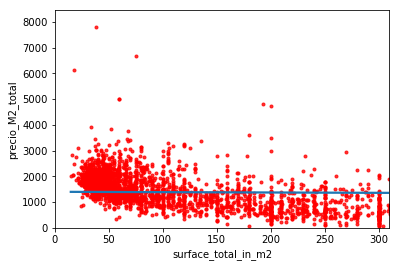

In [44]:
# Grafico regplot la relacion entre el precio por m2 total y superficie total 
sns.regplot(df_gba_zo.surface_total_in_m2, df_gba_zo.precio_M2_total, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(bottom=0);

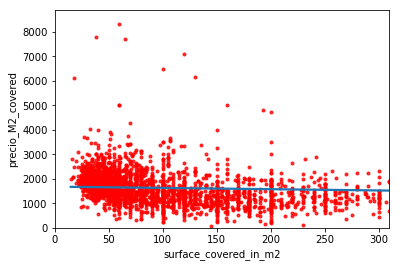

In [45]:
# Grafico regplot la relacion entre el precio por m2 cubierta y superficie cubierta
sns.regplot(df_gba_zo.surface_covered_in_m2, df_gba_zo.precio_M2_covered, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(bottom=0);

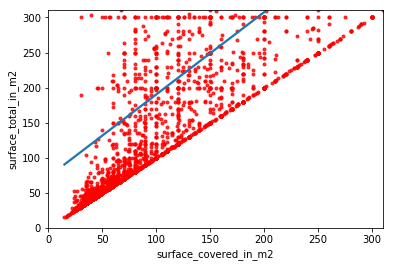

In [46]:
## Regplot entre superficie Cubierta y Total
sns.regplot(df_gba_zo.surface_covered_in_m2, df_gba_zo.surface_total_in_m2, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(0,310);

## 2. Desarrollo de modelos ##

### 2.1. Modelo general a nivel pais ###

#### Modelo para todas las propiedades ####

In [47]:
data_rooms_notnull = data.rooms.notnull()

data_pais = data[data_rooms_notnull]

In [48]:
#Agregamos columnas elevadas al cuadrado para detectar si hay alguna relacion de un orden superior
data_pais['sup_covered_square'] = data_pais.surface_covered_in_m2 ** 2
data_pais['sup_total_square'] = data_pais.surface_total_in_m2 ** 2
data_pais['room_square'] = data_pais.rooms ** 2

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
def train_test_mse_r2(feature_cols):
    x = data_pais[feature_cols]
    y = data_pais.precio_M2_covered
    x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True) 
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    y_pred = linreg.predict(x_test)
    print('MSE: ',mean_squared_error(y_test, y_pred))
    print('R^2 Score: ',r2_score(y_test,y_pred))
    #print('R^2 Score Test: ',linreg.score(x_test,y_test))
    print('R^2 Score Train: ',linreg.score(x_train,y_train))
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [57]:
#1. variables a la 1, con:
    #con dummies de tipo propiedad porque consideramos todas las propiedades.
    #con superficie total in m2 ---> LINEAL
    #sin surface_covered_in_m2 
    #con rooms --> LINEAL
    #con price_aprox_usd ---> LINEAL
    #sin provincia, 'precio_M2_total', 'precio_M2_covered', 'Comuna', 'Region','property_type', 'description', 'geonames_id', 'lat-lon',
features = ['price_aprox_usd', 'surface_total_in_m2', 'rooms', 'garage_dummie','propiedad_PH', 'propiedad_apartment', 
        'propiedad_house','propiedad_store',
        'Pileta_dummie', 'Gym_dummie',
       'Luz_dummie', 'Patio_dummie','propiedad_PH', 'propiedad_apartment',
       'propiedad_house', 'propiedad_store']
train_test_mse_r2(features)

MSE:  788341.3504362793
R^2 Score:  0.33315977301142985
R^2 Score Test:  0.33315977301142985
R^2 Score Train:  0.3439738707828933
MAE: 614.9300366339496
RMSE: 887.8858881839936


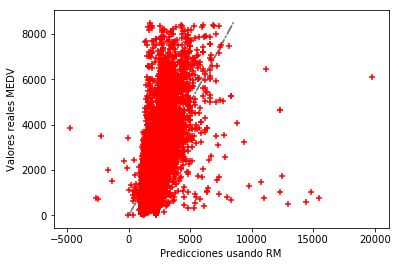

EMC: 766168.8811722696
                            OLS Regression Results                            
Dep. Variable:      precio_M2_covered   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     1993.
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:07:53   Log-Likelihood:            -3.4650e+05
No. Observations:               42290   AIC:                         6.930e+05
Df Residuals:                   42278   BIC:                         6.931e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const      

In [58]:
#Utilizando Stats Model
import statsmodels.api as sm

# De manera análoga a la vista en el primer ejercicio, definimos el vector de variables con la primer variable RM.
X = data_pais[['price_aprox_usd','surface_total_in_m2', 'rooms', 'garage_dummie','propiedad_PH', 'propiedad_apartment', 
        'propiedad_house','propiedad_store',
        'Pileta_dummie', 'Gym_dummie',
       'Luz_dummie', 'Patio_dummie','propiedad_PH', 'propiedad_apartment',
       'propiedad_house', 'propiedad_store']]

y = data_pais[["precio_M2_covered"]]

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())

# 2.2. Modelo solo de Capital Federal

**Nos vamos a quedar únicamente con observaciones de Capital Federal con registros en la variable Rooms**

In [59]:
mask_cf = (data.Provincia == 'Capital Federal') & (data.rooms.notnull())
df_cf = data.loc[mask_cf,:]
df_cf.shape

(13992, 23)

Vemos que el dataset resultante termina siendo de 13.992 observaciones. Creemos que esta cantidad de datos es a priori lo suficientemente robusta como para estimar un modelo. 

No obstante, dentro de estos 13.992 se encuentran todos los tipos de propiedades. A nosotros nos va a interesar en particular en este caso estudiar cómo se comporta el precio por metro cuadrado de los departamentos, siendo que este es el tipo de propiedad predominante en CABA. ####

In [60]:
# Cantidad de observaciones en departamentos
print(df_cf.propiedad_apartment.sum())

12420


En definitiva, el modelo tendrá como input un total de 12.420 observaciones: buscará explicar el comportamiento del precio por metro cuadrado de los departamentos en CABA 

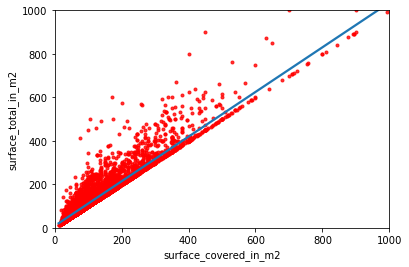

In [61]:
## Regplot entre superficie Cuierta y Total (Ver si conviene mantenerlo, teniendo en cuenta que ya esta en la parte exploratoria)
sns.regplot(df_cf.surface_covered_in_m2, df_cf.surface_total_in_m2, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,1000)
plt.ylim(0,1000);

In [59]:
df_cf.corr()

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,propiedad_PH,propiedad_apartment,propiedad_house,propiedad_store,precio_M2_total,precio_M2_covered,rooms,garage_dummie,Pileta_dummie,Gym_dummie,Luz_dummie,Patio_dummie,geonames_id
price_aprox_usd,1.000000,0.676774,0.667236,-0.035428,-0.148945,0.147717,0.160595,0.429911,0.430410,0.010344,-0.008730,-0.005392,-0.003778,-0.000566,-0.000776,0.004405
surface_total_in_m2,0.676774,1.000000,0.988212,0.042193,-0.283874,0.218069,0.237847,-0.054793,-0.027547,0.002379,0.003249,-0.009681,-0.005564,0.006079,-0.001674,-0.000917
surface_covered_in_m2,0.667236,0.988212,1.000000,0.014526,-0.239287,0.164874,0.246562,-0.024504,-0.034055,0.002478,0.003073,-0.009179,-0.006956,0.005623,-0.000460,-0.001652
propiedad_PH,-0.035428,0.042193,0.014526,1.000000,-0.626892,-0.042126,-0.039570,-0.198336,-0.146994,-0.003572,0.006342,0.007432,-0.000231,-0.004243,0.010181,-0.002690
propiedad_apartment,-0.148945,-0.283874,-0.239287,-0.626892,1.000000,-0.530922,-0.498699,0.234368,0.194413,0.001129,-0.010782,-0.007822,0.002101,-0.003923,-0.008060,0.003101
propiedad_house,0.147717,0.218069,0.164874,-0.042126,-0.530922,1.000000,-0.033512,-0.169734,-0.137128,-0.004462,0.008160,0.006420,0.000588,0.007356,-0.000887,-0.012879
propiedad_store,0.160595,0.237847,0.246562,-0.039570,-0.498699,-0.033512,1.000000,-0.005341,-0.029974,0.007070,0.003310,-0.001626,-0.004195,0.004643,0.003163,0.011259
precio_M2_total,0.429911,-0.054793,-0.024504,-0.198336,0.234368,-0.169734,-0.005341,1.000000,0.923873,0.014353,-0.018790,-0.002010,-0.005552,-0.006418,0.001154,0.001370
precio_M2_covered,0.430410,-0.027547,-0.034055,-0.146994,0.194413,-0.137128,-0.029974,0.923873,1.000000,0.013997,-0.016614,-0.002398,0.003401,-0.001714,-0.000770,0.002780
rooms,0.010344,0.002379,0.002478,-0.003572,0.001129,-0.004462,0.007070,0.014353,0.013997,1.000000,0.155177,0.031345,-0.038252,-0.078550,0.056298,0.028810


Aca vemos la colinealidad entre sup total y cubierta** que  justifica el valor mostrado en la matriz de correlacion (**0.98**).
Esto puede generar problemas entonces a la hora de realizar un modelo vamos a tener que tener en cuenta
- Si utilizamos la variable m2_totales o m2_cubiertos
- En base a laa descicion de arriba, camabiar la variable target (precio_por_m2_total o precio_por_m2_cubierto) para ver por cual sup calculamos el precio del m2 

**Es interesante observar cómo algunos sectores dentro de la ciudad pueden tornarse importantes a la hora de explicar este comportamiento. Por ello, agarramos el vector Barrios y lo "desarmamos" en dummies, para intentar captar algún efecto.**

El paso de creación de dummies lo vamos a hacer dos veces, para no pisar los datasets dado que nos dividimos el trabajo entre quien armó el modelo de CABA y quien armó el modelo de CABA - departamentos.

### Creacion Dummies para la columna Barrio

In [62]:
df_cf_final = pd.get_dummies(df_cf,columns=['Barrio'],prefix='Barrio',drop_first=False)
df_cf_final.sample(5)

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,Provincia,propiedad_PH,propiedad_apartment,propiedad_house,propiedad_store,precio_M2_total,precio_M2_covered,...,Barrio_Villa Lugano,Barrio_Villa Luro,Barrio_Villa Ortuzar,Barrio_Villa Pueyrredón,Barrio_Villa Real,Barrio_Villa Riachuelo,Barrio_Villa Santa Rita,Barrio_Villa Soldati,Barrio_Villa Urquiza,Barrio_Villa del Parque
38242,270000.0,113.0,82.0,Capital Federal,0,1,0,0,2389.38,3292.682927,...,0,0,0,0,0,0,0,0,0,0
38253,279000.0,169.0,169.0,Capital Federal,0,1,0,0,1650.89,1650.887574,...,0,0,0,0,0,0,0,0,0,0
15044,109000.0,49.0,44.0,Capital Federal,0,1,0,0,2224.49,2477.272727,...,0,0,0,0,0,0,0,0,0,0
19133,139000.0,69.0,55.0,Capital Federal,0,1,0,0,2014.49,2527.272727,...,0,0,0,0,0,0,0,0,0,0
48484,127000.0,46.0,41.0,Capital Federal,0,1,0,0,2760.87,3097.560976,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df_cf_final.columns

Index(['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'Provincia', 'propiedad_PH', 'propiedad_apartment', 'propiedad_house',
       'propiedad_store', 'precio_M2_total', 'precio_M2_covered', 'Comuna',
       'Region', 'rooms', 'garage_dummie', 'property_type', 'description',
       'Pileta_dummie', 'Gym_dummie', 'Luz_dummie', 'Patio_dummie',
       'geonames_id', 'lat-lon', 'Barrio_Abasto', 'Barrio_Agronomía',
       'Barrio_Almagro', 'Barrio_Balvanera', 'Barrio_Barracas',
       'Barrio_Barrio Norte', 'Barrio_Belgrano', 'Barrio_Boca', 'Barrio_Boedo',
       'Barrio_Caballito', 'Barrio_Catalinas', 'Barrio_Centro / Microcentro',
       'Barrio_Chacarita', 'Barrio_Coghlan', 'Barrio_Colegiales',
       'Barrio_Congreso', 'Barrio_Constitución', 'Barrio_Flores',
       'Barrio_Floresta', 'Barrio_Las Cañitas', 'Barrio_Liniers',
       'Barrio_Mataderos', 'Barrio_Monserrat', 'Barrio_Monte Castro',
       'Barrio_Nuñez', 'Barrio_Once', 'Barrio_Palermo',
       'Barri

In [64]:
#Agregamos columnas elevadas al cuadrado para detectar si hay alguna relacion de un orden superior
df_cf_final['sup_covered_square'] = df_cf_final.surface_covered_in_m2 ** 2
df_cf_final['sup_total_square'] = df_cf_final.surface_total_in_m2 ** 2
df_cf_final['room_square'] = df_cf_final.rooms ** 2

# Especificacion del modelo

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
def train_test_mse_r2(feature_cols):
    x = df_cf_final[feature_cols]
    y = df_cf_final.precio_M2_covered
    x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True) 
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    y_pred = linreg.predict(x_test)
    print('MSE: ',mean_squared_error(y_test, y_pred))
    print('R^2 Score: ',r2_score(y_test,y_pred))
    print('R^2 Score Train: ',linreg.score(x_train,y_train))
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [68]:
#1. variables a la 1, con:
    #dummies barrios (sin 'Barrio_Centro / Microcentro')
    #sin superficie total in m2
    #con surface_covered_in_m2 ---> LINEAL
    #con rooms --> LINEAL
    #con price_aprox_usd ---> LINEAL
    #sin provincia, barrio 'precio_M2_total', 'precio_M2_covered', 'Comuna', 'Region','property_type', 'description', 'geonames_id', 'lat-lon',
columnas = ['price_aprox_usd', 'surface_covered_in_m2', 'rooms', 'garage_dummie','propiedad_PH', 'propiedad_apartment', 
        'propiedad_house','propiedad_store',
        'Pileta_dummie', 'Gym_dummie',
       'Luz_dummie', 'Patio_dummie', 'Barrio_Abasto',
       'Barrio_Agronomía', 'Barrio_Almagro', 'Barrio_Balvanera',
       'Barrio_Barracas', 'Barrio_Barrio Norte', 'Barrio_Belgrano',
       'Barrio_Boca', 'Barrio_Boedo', 'Barrio_Caballito', 'Barrio_Catalinas',
       'Barrio_Chacarita', 'Barrio_Coghlan',
       'Barrio_Colegiales', 'Barrio_Congreso', 'Barrio_Constitución',
       'Barrio_Flores', 'Barrio_Floresta', 'Barrio_Las Cañitas',
       'Barrio_Liniers', 'Barrio_Mataderos', 'Barrio_Monserrat',
       'Barrio_Monte Castro', 'Barrio_Nuñez', 'Barrio_Once', 'Barrio_Palermo',
       'Barrio_Parque Avellaneda', 'Barrio_Parque Centenario',
       'Barrio_Parque Chacabuco', 'Barrio_Parque Chas',
       'Barrio_Parque Patricios', 'Barrio_Paternal', 'Barrio_Pompeya',
       'Barrio_Puerto Madero', 'Barrio_Recoleta', 'Barrio_Retiro',
       'Barrio_Saavedra', 'Barrio_San Cristobal', 'Barrio_San Nicolás',
       'Barrio_San Telmo', 'Barrio_Tribunales', 'Barrio_Velez Sarsfield',
       'Barrio_Versalles', 'Barrio_Villa Crespo', 'Barrio_Villa Devoto',
       'Barrio_Villa General Mitre', 'Barrio_Villa Lugano',
       'Barrio_Villa Luro', 'Barrio_Villa Ortuzar', 'Barrio_Villa Pueyrredón',
       'Barrio_Villa Real', 'Barrio_Villa Riachuelo',
       'Barrio_Villa Santa Rita', 'Barrio_Villa Soldati',
       'Barrio_Villa Urquiza', 'Barrio_Villa del Parque']
train_test_mse_r2(columnas)

MSE:  547770.12445435
R^2 Score:  0.569580436291337
R^2 Score Train:  0.5656597991598016
MAE: 535.6089480814016
RMSE: 740.1149400291484


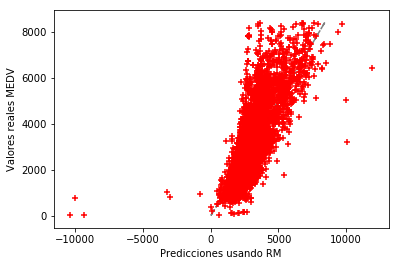

EMC: 569285.5501346801
                            OLS Regression Results                            
Dep. Variable:      precio_M2_covered   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     272.8
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:11:40   Log-Likelihood:            -1.1257e+05
No. Observations:               13992   AIC:                         2.253e+05
Df Residuals:                   13924   BIC:                         2.258e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [69]:
#Utilizando Stats Model
import statsmodels.api as sm

# De manera análoga a la vista en el primer ejercicio, definimos el vector de variables con la primer variable RM.
X = df_cf_final[['price_aprox_usd', 'surface_covered_in_m2', 'rooms', 'garage_dummie','propiedad_PH', 'propiedad_apartment', 
        'propiedad_house','propiedad_store',
        'Pileta_dummie', 'Gym_dummie',
       'Luz_dummie', 'Patio_dummie', 'Barrio_Abasto',
       'Barrio_Agronomía', 'Barrio_Almagro', 'Barrio_Balvanera',
       'Barrio_Barracas', 'Barrio_Barrio Norte', 'Barrio_Belgrano',
       'Barrio_Boca', 'Barrio_Boedo', 'Barrio_Caballito', 'Barrio_Catalinas',
       'Barrio_Chacarita', 'Barrio_Coghlan',
       'Barrio_Colegiales', 'Barrio_Congreso', 'Barrio_Constitución',
       'Barrio_Flores', 'Barrio_Floresta', 'Barrio_Las Cañitas',
       'Barrio_Liniers', 'Barrio_Mataderos', 'Barrio_Monserrat',
       'Barrio_Monte Castro', 'Barrio_Nuñez', 'Barrio_Once', 'Barrio_Palermo',
       'Barrio_Parque Avellaneda', 'Barrio_Parque Centenario',
       'Barrio_Parque Chacabuco', 'Barrio_Parque Chas',
       'Barrio_Parque Patricios', 'Barrio_Paternal', 'Barrio_Pompeya',
       'Barrio_Puerto Madero', 'Barrio_Recoleta', 'Barrio_Retiro',
       'Barrio_Saavedra', 'Barrio_San Cristobal', 'Barrio_San Nicolás',
       'Barrio_San Telmo', 'Barrio_Tribunales', 'Barrio_Velez Sarsfield',
       'Barrio_Versalles', 'Barrio_Villa Crespo', 'Barrio_Villa Devoto',
       'Barrio_Villa General Mitre', 'Barrio_Villa Lugano',
       'Barrio_Villa Luro', 'Barrio_Villa Ortuzar', 'Barrio_Villa Pueyrredón',
       'Barrio_Villa Real', 'Barrio_Villa Riachuelo',
       'Barrio_Villa Santa Rita', 'Barrio_Villa Soldati',
       'Barrio_Villa Urquiza', 'Barrio_Villa del Parque']]

y = df_cf_final[["precio_M2_covered"]]

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())

In [70]:
# Utlizando sup_covered_square
columnas1 = ['price_aprox_usd', 'sup_covered_square', 'rooms', 'garage_dummie','propiedad_PH', 'propiedad_apartment', 
        'propiedad_house','propiedad_store',
        'Pileta_dummie', 'Gym_dummie',
       'Luz_dummie', 'Patio_dummie', 'Barrio_Abasto',
       'Barrio_Agronomía', 'Barrio_Almagro', 'Barrio_Balvanera',
       'Barrio_Barracas', 'Barrio_Barrio Norte', 'Barrio_Belgrano',
       'Barrio_Boca', 'Barrio_Boedo', 'Barrio_Caballito', 'Barrio_Catalinas',
       'Barrio_Chacarita', 'Barrio_Coghlan',
       'Barrio_Colegiales', 'Barrio_Congreso', 'Barrio_Constitución',
       'Barrio_Flores', 'Barrio_Floresta', 'Barrio_Las Cañitas',
       'Barrio_Liniers', 'Barrio_Mataderos', 'Barrio_Monserrat',
       'Barrio_Monte Castro', 'Barrio_Nuñez', 'Barrio_Once', 'Barrio_Palermo',
       'Barrio_Parque Avellaneda', 'Barrio_Parque Centenario',
       'Barrio_Parque Chacabuco', 'Barrio_Parque Chas',
       'Barrio_Parque Patricios', 'Barrio_Paternal', 'Barrio_Pompeya',
       'Barrio_Puerto Madero', 'Barrio_Recoleta', 'Barrio_Retiro',
       'Barrio_Saavedra', 'Barrio_San Cristobal', 'Barrio_San Nicolás',
       'Barrio_San Telmo', 'Barrio_Tribunales', 'Barrio_Velez Sarsfield',
       'Barrio_Versalles', 'Barrio_Villa Crespo', 'Barrio_Villa Devoto',
       'Barrio_Villa General Mitre', 'Barrio_Villa Lugano',
       'Barrio_Villa Luro', 'Barrio_Villa Ortuzar', 'Barrio_Villa Pueyrredón',
       'Barrio_Villa Real', 'Barrio_Villa Riachuelo',
       'Barrio_Villa Santa Rita', 'Barrio_Villa Soldati',
       'Barrio_Villa Urquiza', 'Barrio_Villa del Parque']
train_test_mse_r2(columnas1)

MSE:  666700.2596403196
R^2 Score:  0.4967360783741007
R^2 Score Train:  0.5068122002897643
MAE: 586.2677337428265
RMSE: 816.5171520796852


# 2.2.2. Modelo de Capital Federal Departamentos

In [71]:
# Creamos las variables dummies de barrios
dummies = pd.get_dummies(df_cf.Barrio,prefix='Barrio')

In [72]:
# Agregamos las dummies al data frame usado
df_cf = pd.concat([df_cf, dummies], axis=1)

También agregamos al dataframe de CABA las variables de superficie cubierta, superficie total y cantidad de habitaciones elevadas al cuadrado, para intentar captar (si existe) algún tipo de relación cuadrática entre alguna de estas variables y el precio por metro cuadrado.

In [73]:
df_cf['sup_covered_square'] = df_cf.surface_covered_in_m2 ** 2
df_cf['sup_total_square'] = df_cf.surface_total_in_m2 ** 2
df_cf['room_square'] = df_cf.rooms ** 2

Por último, y como explicábamos anteriormente, filtramos el dataframe de CABA únicamente tomando los **departamentos**.

In [74]:
df_cf_edificios = df_cf_final.loc[df_cf.propiedad_apartment==True,:]
df_cf_edificios.shape

(12420, 82)

Ahora hacemos un df_cf_edificios.columns para chequear las variables explicativas que tendremos disponibles a la hora de plantear el modelo para explicar la variable precio por metro cuadrad0.

In [75]:
df_cf_edificios.columns

Index(['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'Provincia', 'propiedad_PH', 'propiedad_apartment', 'propiedad_house',
       'propiedad_store', 'precio_M2_total', 'precio_M2_covered', 'Comuna',
       'Region', 'rooms', 'garage_dummie', 'property_type', 'description',
       'Pileta_dummie', 'Gym_dummie', 'Luz_dummie', 'Patio_dummie',
       'geonames_id', 'lat-lon', 'Barrio_Abasto', 'Barrio_Agronomía',
       'Barrio_Almagro', 'Barrio_Balvanera', 'Barrio_Barracas',
       'Barrio_Barrio Norte', 'Barrio_Belgrano', 'Barrio_Boca', 'Barrio_Boedo',
       'Barrio_Caballito', 'Barrio_Catalinas', 'Barrio_Centro / Microcentro',
       'Barrio_Chacarita', 'Barrio_Coghlan', 'Barrio_Colegiales',
       'Barrio_Congreso', 'Barrio_Constitución', 'Barrio_Flores',
       'Barrio_Floresta', 'Barrio_Las Cañitas', 'Barrio_Liniers',
       'Barrio_Mataderos', 'Barrio_Monserrat', 'Barrio_Monte Castro',
       'Barrio_Nuñez', 'Barrio_Once', 'Barrio_Palermo',
       'Barri

**Definimos de una función** que corra la regresión lineal para ahorrar pasos y poder probar más veces.

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
def train_test_mse_r2(feature_cols):
    x = df_cf_edificios[feature_cols]
    y = df_cf_edificios.precio_M2_covered
    x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True) 
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    y_pred = linreg.predict(x_test)
    print('MSE: ',mean_squared_error(y_test, y_pred))
    print('R^2 Score: ',r2_score(y_test,y_pred))
    print('R^2 Score Train: ',linreg.score(x_train,y_train))
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


## Primera prueba: modelo lineal multivariable ####

**Estimamos el modelo con todas las variables en grado 1 (sin elevar), tomando como base el barrio "Barrio_Centro/Microcentro" (dado que no podemos especificar un modelo tomando todas las "k" dummies, sino que debemos hacerlo en función de "k-1" dummies.**
- Elegimos superficie cubierta y no total (no ambas, porque como explicamos al principio, creemos a simple vista que pueden tener cierto grado de colinealidad que rompería con algunos de los supuestos de Gauss-Markov y dejaría sin efecto algunos de los requisitos para los residuos.
- Como estamos viendo sólo CABA, no usamos Provincia.
- Como estamos viendo sólo departamentos, no usamos las dummies de property_type.
- Tampoco usamos 'Comuna', 'Region', 'description', 'geonames_id' ni 'lat-lon'.

In [77]:
columnas1 = ['price_aprox_usd', 'surface_covered_in_m2', 'rooms', 'garage_dummie',
        'Pileta_dummie', 'Gym_dummie',
       'Luz_dummie', 'Patio_dummie', 'Barrio_Abasto',
       'Barrio_Agronomía', 'Barrio_Almagro', 'Barrio_Balvanera',
       'Barrio_Barracas', 'Barrio_Barrio Norte', 'Barrio_Belgrano',
       'Barrio_Boca', 'Barrio_Boedo', 'Barrio_Caballito', 'Barrio_Catalinas',
       'Barrio_Centro / Microcentro', 'Barrio_Chacarita', 'Barrio_Coghlan',
       'Barrio_Colegiales', 'Barrio_Congreso', 'Barrio_Constitución',
       'Barrio_Flores', 'Barrio_Floresta', 'Barrio_Las Cañitas',
       'Barrio_Liniers', 'Barrio_Mataderos', 'Barrio_Monserrat',
       'Barrio_Monte Castro', 'Barrio_Nuñez', 'Barrio_Once', 'Barrio_Palermo',
       'Barrio_Parque Avellaneda', 'Barrio_Parque Centenario',
       'Barrio_Parque Chacabuco', 'Barrio_Parque Chas',
       'Barrio_Parque Patricios', 'Barrio_Paternal', 'Barrio_Pompeya',
       'Barrio_Puerto Madero', 'Barrio_Recoleta', 'Barrio_Retiro',
       'Barrio_Saavedra', 'Barrio_San Cristobal', 'Barrio_San Nicolás',
       'Barrio_San Telmo', 'Barrio_Tribunales', 'Barrio_Velez Sarsfield',
       'Barrio_Versalles', 'Barrio_Villa Crespo', 'Barrio_Villa Devoto',
       'Barrio_Villa General Mitre', 'Barrio_Villa Lugano',
       'Barrio_Villa Luro', 'Barrio_Villa Ortuzar', 'Barrio_Villa Pueyrredón',
       'Barrio_Villa Real', 'Barrio_Villa Riachuelo',
       'Barrio_Villa Santa Rita', 'Barrio_Villa Soldati',
       'Barrio_Villa Urquiza', 'Barrio_Villa del Parque']
train_test_mse_r2(columnas1)

MSE:  370136.1840324786
R^2 Score:  0.7168585324087777
R^2 Score Train:  0.7176435819566009
MAE: 413.48593031668275
RMSE: 608.3881853163148


## Segunda prueba: intentando captar una relación cuadrática con la variable Rooms ####

In [78]:
columnas2 = ['price_aprox_usd', 'surface_covered_in_m2', 'room_square', 'garage_dummie',
        'Pileta_dummie', 'Gym_dummie',
       'Luz_dummie', 'Patio_dummie', 'Barrio_Abasto',
       'Barrio_Agronomía', 'Barrio_Almagro', 'Barrio_Balvanera',
       'Barrio_Barracas', 'Barrio_Barrio Norte', 'Barrio_Belgrano',
       'Barrio_Boca', 'Barrio_Boedo', 'Barrio_Caballito', 'Barrio_Catalinas',
       'Barrio_Chacarita', 'Barrio_Coghlan',
       'Barrio_Colegiales', 'Barrio_Congreso', 'Barrio_Constitución',
       'Barrio_Flores', 'Barrio_Floresta', 'Barrio_Las Cañitas',
       'Barrio_Liniers', 'Barrio_Mataderos', 'Barrio_Monserrat',
       'Barrio_Monte Castro', 'Barrio_Nuñez', 'Barrio_Once', 'Barrio_Palermo',
       'Barrio_Parque Avellaneda', 'Barrio_Parque Centenario',
       'Barrio_Parque Chacabuco', 'Barrio_Parque Chas',
       'Barrio_Parque Patricios', 'Barrio_Paternal', 'Barrio_Pompeya',
       'Barrio_Puerto Madero', 'Barrio_Recoleta', 'Barrio_Retiro',
       'Barrio_Saavedra', 'Barrio_San Cristobal', 'Barrio_San Nicolás',
       'Barrio_San Telmo', 'Barrio_Tribunales', 'Barrio_Velez Sarsfield',
       'Barrio_Versalles', 'Barrio_Villa Crespo', 'Barrio_Villa Devoto',
       'Barrio_Villa General Mitre', 'Barrio_Villa Lugano',
       'Barrio_Villa Luro', 'Barrio_Villa Ortuzar', 'Barrio_Villa Pueyrredón',
       'Barrio_Villa Real', 'Barrio_Villa Riachuelo',
       'Barrio_Villa Santa Rita', 'Barrio_Villa Soldati',
       'Barrio_Villa Urquiza', 'Barrio_Villa del Parque']
train_test_mse_r2(columnas2)

MSE:  383107.3061724981
R^2 Score:  0.7020751547272245
R^2 Score Train:  0.7219236288135809
MAE: 413.3539819441977
RMSE: 618.9566270527347


Vemos que acá estamos teniendo un R2 similar (o incluso levemente mejorado) que al mismo tiempo nos permite reducir levemente los dos tipos de errores, tanto en términos cuadrados como absolutos.

Estaríamos diciendo que, en promedio, estamos logrando explicar con nuestro set de features un 73% de las variaciones en el valor en dólares del metro cuadrado cubierto. Al mismo tiempo, al estimar nos estaríamos equivocando en promedio 500 dólares por estimación (un desvío de +-USD500).

Ahora intentaremos hacer unas pruebas adicionales en pos de mejorarlo, pero como veremos más adelante, este será el modelo que terminaremos utilizando para hacer forecasting.

### Ahora vamos a probar de especificar el modelo en la librería STATSMODELS ###

La idea de hacer esta prueba utilizando la librería STATSMODELS es para poder ver cuáles de las variables que estamos utilizando para especificar el modelo superan el test-t, **es decir, cuales tendríamos poder estadístico para afirmar que son justamente estadísticamente significativos**.

Vamos a utilizar para explicar el precio por metro cuadrado cubierto las mismas variables que utilizamos en el último modelo (prueba 2).

**La desventaja de esta librería** es que no vemos a priori la posibilidad de shufflear la información, por lo que el modelo podría sufrir (no debería) algún tipo de sesgo si la información sigue algún tipo de patrón (según vimos en el desafío 1, no parece hacerlo).

Tras correr este modelo nos encontramos con un R2 Ajustado similar a los que veníamos observando en la librería anterior, y con un test F que nos afirma que todas las variables en su conjunto son significativas.

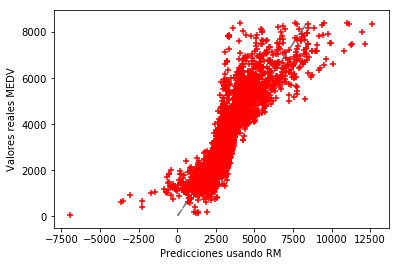

EMC: 355329.9211034804
Raíz ECM:  596.095563734105
                            OLS Regression Results                            
Dep. Variable:      precio_M2_covered   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     499.2
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:13:44   Log-Likelihood:                -96992.
No. Observations:               12420   AIC:                         1.941e+05
Df Residuals:                   12356   BIC:                         1.946e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [79]:
import statsmodels.api as sm

X = df_cf_edificios[['price_aprox_usd', 'surface_covered_in_m2', 'room_square', 'garage_dummie',
        'Pileta_dummie', 'Gym_dummie',
       'Luz_dummie', 'Patio_dummie', 'Barrio_Abasto',
       'Barrio_Agronomía', 'Barrio_Almagro', 'Barrio_Balvanera',
       'Barrio_Barracas', 'Barrio_Barrio Norte', 'Barrio_Belgrano',
       'Barrio_Boca', 'Barrio_Boedo', 'Barrio_Caballito', 'Barrio_Catalinas',
       'Barrio_Chacarita', 'Barrio_Coghlan',
       'Barrio_Colegiales', 'Barrio_Congreso', 'Barrio_Constitución',
       'Barrio_Flores', 'Barrio_Floresta', 'Barrio_Las Cañitas',
       'Barrio_Liniers', 'Barrio_Mataderos', 'Barrio_Monserrat',
       'Barrio_Monte Castro', 'Barrio_Nuñez', 'Barrio_Once', 'Barrio_Palermo',
       'Barrio_Parque Avellaneda', 'Barrio_Parque Centenario',
       'Barrio_Parque Chacabuco', 'Barrio_Parque Chas',
       'Barrio_Parque Patricios', 'Barrio_Paternal', 'Barrio_Pompeya',
       'Barrio_Puerto Madero', 'Barrio_Recoleta', 'Barrio_Retiro',
       'Barrio_Saavedra', 'Barrio_San Cristobal', 'Barrio_San Nicolás',
       'Barrio_San Telmo', 'Barrio_Tribunales', 'Barrio_Velez Sarsfield',
       'Barrio_Versalles', 'Barrio_Villa Crespo', 'Barrio_Villa Devoto',
       'Barrio_Villa General Mitre', 'Barrio_Villa Lugano',
       'Barrio_Villa Luro', 'Barrio_Villa Ortuzar', 'Barrio_Villa Pueyrredón',
       'Barrio_Villa Real', 'Barrio_Villa Riachuelo',
       'Barrio_Villa Santa Rita', 'Barrio_Villa Soldati',
       'Barrio_Villa Urquiza', 'Barrio_Villa del Parque']]
y = df_cf_edificios[["precio_M2_covered"]]

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print("Raíz ECM: ", np.sqrt(mean_squared_error(y, predictions)))
print (model.summary())

### Hacemos una última prueba quitando las variables que no son significativas ###

**El test t nos permite afirmar** que dada la evidencia empirica y el estadístico de prueba obtenido (y con un nivel de confianza 1-alfa), podamos o no concluir que el estimador del parametro es estadisticamente distinto de 0. Por, esta prueba nos permite afirmar si el verdadero valor poblacional del parámetro es distinto de cero o no. En otras palabras, nos permite ver si la variable en cuestión es o no relevante para explicar a la regresada.

**Por esto es que hacemos una última prueba quitando de la matriz de features todas aquellas variables que en el test-t de la prueba anterior hayan sido superiores al 6%.**

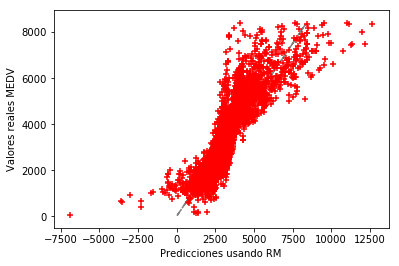

EMC: 356765.7806004645
Raíz ECM:  597.2987364798828
                            OLS Regression Results                            
Dep. Variable:      precio_M2_covered   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     847.1
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:15:04   Log-Likelihood:                -97017.
No. Observations:               12420   AIC:                         1.941e+05
Df Residuals:                   12382   BIC:                         1.944e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [80]:
X = df_cf_edificios[['price_aprox_usd', 'surface_covered_in_m2', 'room_square', 
        'Barrio_Abasto',
        'Barrio_Balvanera',
        'Barrio_Barrio Norte', 'Barrio_Belgrano',
       'Barrio_Boca', 'Barrio_Caballito', 'Barrio_Catalinas',
        'Barrio_Coghlan',
       'Barrio_Colegiales', 'Barrio_Congreso', 'Barrio_Constitución',
       'Barrio_Flores', 'Barrio_Floresta', 'Barrio_Las Cañitas',
       'Barrio_Liniers', 'Barrio_Mataderos', 
       'Barrio_Monte Castro', 'Barrio_Nuñez', 'Barrio_Once', 'Barrio_Palermo',
       'Barrio_Parque Avellaneda', 
       'Barrio_Parque Chacabuco',
       'Barrio_Parque Patricios', 'Barrio_Paternal', 'Barrio_Pompeya',
       'Barrio_Puerto Madero', 'Barrio_Recoleta', 'Barrio_Retiro',
       'Barrio_Saavedra',  
       'Barrio_Villa Crespo', 
       'Barrio_Villa Lugano',
       'Barrio_Villa Luro', 'Barrio_Villa Soldati',
       'Barrio_Villa Urquiza']]
y = df_cf_edificios[["precio_M2_covered"]]

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print("Raíz ECM: ", np.sqrt(mean_squared_error(y, predictions)))
print (model.summary())

Probando este mismo conjunto de variables explicativas en la librería scikit Learn, obtuvimos un R2 similar.

La idea de este último intento era ver si podíamos mejorar la especificación del modelo, quitando algunas de las variables que no son significativas para de esta forma intentar minimizar tanto el error cuadrático medio como su versión absoluta.

Según se puede observar, esto no parece estar dándonos resultados, dado que los errores son incluso levemente superiores.
Por lo tanto, optaremos por utilizar como nuestro modelo definitivo el del apartado SEGUNDA PRUEBA.

In [81]:
columnas3 = ['price_aprox_usd', 'surface_covered_in_m2', 'room_square', 
        'Barrio_Abasto',
        'Barrio_Balvanera',
        'Barrio_Barrio Norte', 'Barrio_Belgrano',
       'Barrio_Boca', 'Barrio_Caballito', 'Barrio_Catalinas',
        'Barrio_Coghlan',
       'Barrio_Colegiales', 'Barrio_Congreso', 'Barrio_Constitución',
       'Barrio_Flores', 'Barrio_Floresta', 'Barrio_Las Cañitas',
       'Barrio_Liniers', 'Barrio_Mataderos', 
       'Barrio_Monte Castro', 'Barrio_Nuñez', 'Barrio_Once', 'Barrio_Palermo',
       'Barrio_Parque Avellaneda', 
       'Barrio_Parque Chacabuco',
       'Barrio_Parque Patricios', 'Barrio_Paternal', 'Barrio_Pompeya',
       'Barrio_Puerto Madero', 'Barrio_Recoleta', 'Barrio_Retiro',
       'Barrio_Saavedra',  
       'Barrio_Villa Crespo', 
       'Barrio_Villa Lugano',
       'Barrio_Villa Luro', 'Barrio_Villa Soldati',
       'Barrio_Villa Urquiza']
train_test_mse_r2(columnas3)

MSE:  337597.14438810514
R^2 Score:  0.7060469229971358
R^2 Score Train:  0.7195446643404427
MAE: 410.6781867875029
RMSE: 581.0311044927846


**Sobre el modelo de CABA - DEPTOS que corrimos en la SEGUNDA PRUEBA, aplicamos las técnicas de regularización de Lasso CV y Ridge CV.**

Ridge y Lasso son dos técnicas regularización vistas en clase que nos permiten, a diferencia de la estimación por mínimos cuadrados ordinarios (MCO), mejorar la precisión de las predicciones y la interpretabilidad/simplificación del modelo (en términos de cantidad de features).
Esto lo hace a través de la penalización por la introducción de nuevas features.
No obstante, debemos tener en cuenta que este tipo de técnicas son implementadas en escenarios de overfiting (sobre-especificación), es decir, situaciones donde el modelo tiene un buen desempeño con los datos de entrenamiento, pero a la hora de intentar realizar predicciones en el set de prueba o con datos reales, tiene una pobre capacidad de extrapolación, debido a su alta varianza.

**Por este motivo, no estamos seguros de que sean las técnicas más apropiadas para emplear en nuestro modelo especificado en la "Segunda Prueba", donde sólo conseguimos un poder predictivo/explicativo del 73% (R2). No creemos que este valor nos sitúe en un escenario de overfiting, sino que más bien nos encontraríamos en la situación opuesta: un escenario de underfitting donde el sesgo es el principal inconveniente.**

Míınimos cuadrados no sería otra cosa que una penalización de 0 por agregar variables. La ventaja de la regresión ridge sobre MCO radica en el trade–off sesgo-varianza. A medida que aumenta λ, la flexibilidad del ajuste ridge disminuye, dando lugar a una disminución de la varianza, pero un mayor sesgo.

Igualmente, a continuación implementaremos las dos técnicas debido a que es uno de los requitos del desafío:

In [84]:
def modelo_ridge_CV(feature_cols):
    X= df_cf_edificios[feature_cols]
    y= df_cf_edificios.precio_M2_covered
    X_train,X_test,y_train,y_test= train_test_split(X,y, random_state=1)
    lm_ridge=linear_model.RidgeCV(alphas=[0.1,1,10], normalize=True, cv=3)
    lm_ridge.fit(X_train,y_train)
    y_pred = lm_ridge.predict(X_train)
    print('Score Ridge Test:', lm_ridge.score(X_test, y_test))
    print('Score Ridge Train: ', lm_ridge.score(X_train, y_train))
    
    plt.plot(y_train,y_train, '-.',c='grey')
    plt.scatter(y_pred, y_train, s=30, c='r', marker='+', zorder=10)
    plt.xlabel("Predicciones model")
    plt.ylabel("Valores reales")
    plt.show()

Score Ridge Test: 0.6695647401187987
Score Ridge Train:  0.673621713806672


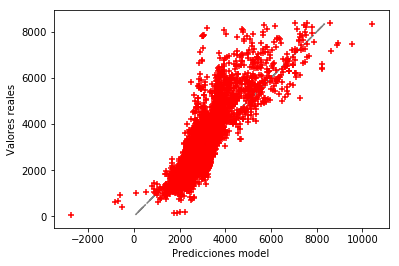

In [85]:
modelo_ridge_CV(columnas2)

In [86]:
def modelo_lasso_cv(feature_cols):
    X= df_cf_edificios[feature_cols]
    y= df_cf_edificios.precio_M2_covered
    X_train,X_test,y_train,y_test= train_test_split(X,y, random_state=1)
    modelo_lasso= linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                 0.05, 0.1, 1, 5, 10, 15, 25],normalize=True, cv=3)
    modelo_lasso.fit(X_train,y_train)
    y_pred = modelo_lasso.predict(X_test)
    print("Score Lasso Test:",modelo_lasso.score(X_test,y_test))
    print("Score Lasso Train:",modelo_lasso.score(X_train,y_train))
    plt.plot(y_test,y_test, '-.',c='grey')
    plt.scatter(y_pred, y_test, s=30, c='g', marker='+', zorder=10)
    plt.xlabel("Predicciones model")
    plt.ylabel("Valores reales")
    plt.show()

Score Lasso Test: 0.7113739857193315
Score Lasso Train: 0.7192823894150968


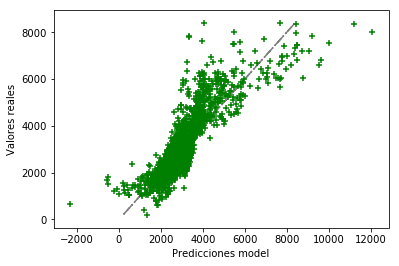

In [87]:
modelo_lasso_cv(columnas2)

Por lo que expusimos antes, no nos preocuparemos en determinar si Ridge o Lasso nos ayudarían a encontrar variables, simplemente fue una breve aproximación a cómo sería la sintaxis.

# 2.2.3. Modelo de Capital Federal (solo casas) #

In [88]:
df_cf_casa = df_cf_final.loc[df_cf.propiedad_house==True,:]
df_cf_casa.shape

(482, 82)

Haremos un modelo para ver el precio del metro cuadrado en las casas de CABA. No va a ser más que para probar otra alternativa, porque no creemos que sea robusto hacer un modelo con 482 datos.

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
def train_test_mse_r2(feature_cols):
    x = df_cf_casa[feature_cols]
    y = df_cf_casa.precio_M2_covered
    x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True) 
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    y_pred = linreg.predict(x_test)
    print('MSE: ',mean_squared_error(y_test, y_pred))
    print('R^2 Score: ',r2_score(y_test,y_pred))
    print('R^2 Score Train: ',linreg.score(x_train,y_train))
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [90]:
columnas = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2','rooms', 'garage_dummie',
        'Pileta_dummie', 'Gym_dummie',
       'Luz_dummie', 'Patio_dummie', 'Barrio_Abasto',
       'Barrio_Agronomía', 'Barrio_Almagro', 'Barrio_Balvanera',
       'Barrio_Barracas', 'Barrio_Barrio Norte', 'Barrio_Belgrano',
       'Barrio_Boca', 'Barrio_Boedo', 'Barrio_Caballito', 'Barrio_Catalinas',
       'Barrio_Centro / Microcentro', 'Barrio_Chacarita', 'Barrio_Coghlan',
       'Barrio_Colegiales', 'Barrio_Congreso', 'Barrio_Constitución',
       'Barrio_Flores', 'Barrio_Floresta', 'Barrio_Las Cañitas',
       'Barrio_Liniers', 'Barrio_Mataderos', 'Barrio_Monserrat',
       'Barrio_Monte Castro', 'Barrio_Nuñez', 'Barrio_Once', 'Barrio_Palermo',
       'Barrio_Parque Avellaneda', 'Barrio_Parque Centenario',
       'Barrio_Parque Chacabuco', 'Barrio_Parque Chas',
       'Barrio_Parque Patricios', 'Barrio_Paternal', 'Barrio_Pompeya',
       'Barrio_Puerto Madero', 'Barrio_Recoleta', 'Barrio_Retiro',
       'Barrio_Saavedra', 'Barrio_San Cristobal', 'Barrio_San Nicolás',
       'Barrio_San Telmo', 'Barrio_Tribunales', 'Barrio_Velez Sarsfield',
       'Barrio_Versalles', 'Barrio_Villa Crespo', 'Barrio_Villa Devoto',
       'Barrio_Villa General Mitre', 'Barrio_Villa Lugano',
       'Barrio_Villa Luro', 'Barrio_Villa Ortuzar', 'Barrio_Villa Pueyrredón',
       'Barrio_Villa Real', 'Barrio_Villa Riachuelo',
       'Barrio_Villa Santa Rita', 'Barrio_Villa Soldati',
       'Barrio_Villa Urquiza', 'Barrio_Villa del Parque']
train_test_mse_r2(columnas)

MSE:  296038.13033339026
R^2 Score:  0.6288204209049775
R^2 Score Train:  0.8591359625585538
MAE: 330.58174047567417
RMSE: 544.0938616942763


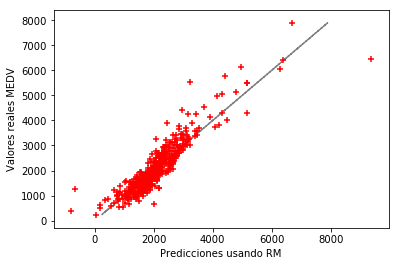

EMC: 160636.00620534935
                            OLS Regression Results                            
Dep. Variable:      precio_M2_covered   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     36.39
Date:                Mon, 28 Sep 2020   Prob (F-statistic):          3.01e-130
Time:                        00:19:36   Log-Likelihood:                -3572.8
No. Observations:                 482   AIC:                             7262.
Df Residuals:                     424   BIC:                             7504.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [91]:
# De manera análoga a la vista en el primer ejercicio, definimos el vector de variables con la primer variable RM.
X = df_cf_casa[['price_aprox_usd', 'surface_covered_in_m2', 'rooms', 'garage_dummie','propiedad_PH', 'propiedad_apartment', 
        'propiedad_house','propiedad_store',
        'Pileta_dummie', 'Gym_dummie',
       'Luz_dummie', 'Patio_dummie', 'Barrio_Abasto',
       'Barrio_Agronomía', 'Barrio_Almagro', 'Barrio_Balvanera',
       'Barrio_Barracas', 'Barrio_Barrio Norte', 'Barrio_Belgrano',
       'Barrio_Boca', 'Barrio_Boedo', 'Barrio_Caballito', 'Barrio_Catalinas',
       'Barrio_Chacarita', 'Barrio_Coghlan',
       'Barrio_Colegiales', 'Barrio_Congreso', 'Barrio_Constitución',
       'Barrio_Flores', 'Barrio_Floresta', 'Barrio_Las Cañitas',
       'Barrio_Liniers', 'Barrio_Mataderos', 'Barrio_Monserrat',
       'Barrio_Monte Castro', 'Barrio_Nuñez', 'Barrio_Once', 'Barrio_Palermo',
       'Barrio_Parque Avellaneda', 'Barrio_Parque Centenario',
       'Barrio_Parque Chacabuco', 'Barrio_Parque Chas',
       'Barrio_Parque Patricios', 'Barrio_Paternal', 'Barrio_Pompeya',
       'Barrio_Puerto Madero', 'Barrio_Recoleta', 'Barrio_Retiro',
       'Barrio_Saavedra', 'Barrio_San Cristobal', 'Barrio_San Nicolás',
       'Barrio_San Telmo', 'Barrio_Tribunales', 'Barrio_Velez Sarsfield',
       'Barrio_Versalles', 'Barrio_Villa Crespo', 'Barrio_Villa Devoto',
       'Barrio_Villa General Mitre', 'Barrio_Villa Lugano',
       'Barrio_Villa Luro', 'Barrio_Villa Ortuzar', 'Barrio_Villa Pueyrredón',
       'Barrio_Villa Real', 'Barrio_Villa Riachuelo',
       'Barrio_Villa Santa Rita', 'Barrio_Villa Soldati',
       'Barrio_Villa Urquiza', 'Barrio_Villa del Parque']]

y = df_cf_casa[["precio_M2_covered"]]

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())

# Portfolio de departamentos para predicciones y para la toma de decisiones 

Seleccionar mediante muestreo aleatorio simple una submuestra de 100
propiedades. Este será su portafolio de departamentos. En base al mejor modelo
que haya encontrado determine cuáles de los departamentos de esa muestra
aleatoria, se encuentran sobrevaluados o subvaluados y en qué magnitud.

Teniendo en cuenta que podría comprar y vender propiedades al precio de
mercado, omitamos costos de transacción, ¿cuál/es de las propiedades de su
portfolio representan una buena oportunidad para comprar y luego vender a un
mejor precio?

## Primero, volvemos a correr nuestro modelo de mayor poder explicativo, el de Departamentos en CABA ##

In [184]:
# Creamos la matriz de features
features = ['price_aprox_usd', 'surface_covered_in_m2', 'rooms', 'garage_dummie',
        'Pileta_dummie', 'Gym_dummie',
       'Luz_dummie', 'Patio_dummie', 'Barrio_Abasto',
       'Barrio_Agronomía', 'Barrio_Almagro', 'Barrio_Balvanera',
       'Barrio_Barracas', 'Barrio_Barrio Norte', 'Barrio_Belgrano',
       'Barrio_Boca', 'Barrio_Boedo', 'Barrio_Caballito', 'Barrio_Catalinas',
       'Barrio_Chacarita', 'Barrio_Coghlan',
       'Barrio_Colegiales', 'Barrio_Congreso', 'Barrio_Constitución',
       'Barrio_Flores', 'Barrio_Floresta', 'Barrio_Las Cañitas',
       'Barrio_Liniers', 'Barrio_Mataderos', 'Barrio_Monserrat',
       'Barrio_Monte Castro', 'Barrio_Nuñez', 'Barrio_Once', 'Barrio_Palermo',
       'Barrio_Parque Avellaneda', 'Barrio_Parque Centenario',
       'Barrio_Parque Chacabuco', 'Barrio_Parque Chas',
       'Barrio_Parque Patricios', 'Barrio_Paternal', 'Barrio_Pompeya',
       'Barrio_Puerto Madero', 'Barrio_Recoleta', 'Barrio_Retiro',
       'Barrio_Saavedra', 'Barrio_San Cristobal', 'Barrio_San Nicolás',
       'Barrio_San Telmo', 'Barrio_Tribunales', 'Barrio_Velez Sarsfield',
       'Barrio_Versalles', 'Barrio_Villa Crespo', 'Barrio_Villa Devoto',
       'Barrio_Villa General Mitre', 'Barrio_Villa Lugano',
       'Barrio_Villa Luro', 'Barrio_Villa Ortuzar', 'Barrio_Villa Pueyrredón',
       'Barrio_Villa Real', 'Barrio_Villa Riachuelo',
       'Barrio_Villa Santa Rita', 'Barrio_Villa Soldati',
       'Barrio_Villa Urquiza', 'Barrio_Villa del Parque']

In [185]:
# Desarrollamos el modelo elegido por fuera de la funcion creada anteriormente para poder construir la muestra y exponer las mejores oportunidades de compra
# Worklow Scikit-Learn
# 1- Elejimos una clase de modelo
from sklearn.linear_model import LinearRegression

# 2- Instanciamos el modelo
linreg = LinearRegression()

# 3- Preparamos la matriz de features y la variable target por fuera de la funcion
x = df_cf_edificios[features]
y = df_cf_edificios.precio_M2_covered

# 4- Separar en train y test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=1)

# 5- Entrenamos el modelo 
linreg.fit(xtrain,ytrain)

# 6- Predecimos etiquetas para 100 datos desconocidos
muestra_100 = xtest.sample(100)
y_pred = linreg.predict(muestra_100)

In [186]:
muestra_100.head()

,price_aprox_usd,surface_covered_in_m2,rooms,garage_dummie,Pileta_dummie,Gym_dummie,Luz_dummie,Patio_dummie,Barrio_Abasto,Barrio_Agronomía,...,Barrio_Villa Lugano,Barrio_Villa Luro,Barrio_Villa Ortuzar,Barrio_Villa Pueyrredón,Barrio_Villa Real,Barrio_Villa Riachuelo,Barrio_Villa Santa Rita,Barrio_Villa Soldati,Barrio_Villa Urquiza,Barrio_Villa del Parque
46752,156500.0,53.0,2.0,0,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8962,83000.0,45.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23199,98000.0,64.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52566,295000.0,101.0,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55172,67500.0,32.0,1.0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
indices = list(muestra_100.index)
data_completa_muestra = data.iloc[indices,:]

In [188]:
data_completa_muestra['y_pred'] = y_pred
data_completa_muestra['y_test']= ytest

In [189]:
data_completa_muestra['diferencia_precio']= data_completa_muestra.y_test - data_completa_muestra.y_pred
data_completa_muestra['diferencia_precio_porcentaje']= round(((data_completa_muestra.y_test / data_completa_muestra.y_pred) - 1) *100,2)

In [190]:
data_completa_muestra.columns

Index(['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'Provincia', 'Barrio', 'propiedad_PH', 'propiedad_apartment',
       'propiedad_house', 'propiedad_store', 'precio_M2_total',
       'precio_M2_covered', 'Comuna', 'Region', 'rooms', 'garage_dummie',
       'property_type', 'description', 'Pileta_dummie', 'Gym_dummie',
       'Luz_dummie', 'Patio_dummie', 'geonames_id', 'lat-lon', 'y_pred',
       'y_test', 'diferencia_precio', 'diferencia_precio_porcentaje'],
      dtype='object')

In [191]:
data_muestra_final = data_completa_muestra.loc[:,['propiedad_apartment','Provincia', 'Barrio','Pileta_dummie','Gym_dummie','Luz_dummie','precio_M2_covered','price_aprox_usd','surface_covered_in_m2','rooms','y_pred',
       'y_test', 'diferencia_precio', 'diferencia_precio_porcentaje']]

In [192]:
data_muestra_final.sample(10)

,propiedad_apartment,Provincia,Barrio,Pileta_dummie,Gym_dummie,Luz_dummie,precio_M2_covered,price_aprox_usd,surface_covered_in_m2,rooms,y_pred,y_test,diferencia_precio,diferencia_precio_porcentaje
59107,1,Capital Federal,Palermo,0,0,0,4705.882353,1600000.0,340.0,7.0,5651.880783,4705.882353,-945.998431,-16.74
41058,1,Capital Federal,Nuñez,0,0,0,3018.867925,160000.0,53.0,5.0,3243.844621,3018.867925,-224.976697,-6.94
26165,1,Capital Federal,Once,1,0,1,1120.689655,65000.0,58.0,2.0,1907.539128,1120.689655,-786.849473,-41.25
5161,1,Capital Federal,Villa del Parque,0,0,1,2237.500000,89500.0,40.0,3.0,2624.496243,2237.500000,-386.996243,-14.75
17107,1,Capital Federal,Paternal,1,0,0,1900.000000,76000.0,40.0,3.0,2216.501935,1900.000000,-316.501935,-14.28
53987,1,Capital Federal,San Telmo,1,1,1,2326.086957,53500.0,23.0,4.0,2789.172989,2326.086957,-463.086032,-16.60
4719,1,Capital Federal,Nuñez,0,0,0,1970.149254,132000.0,67.0,3.0,2846.284142,1970.149254,-876.134888,-30.78
17634,1,Capital Federal,Barrio Norte,0,0,0,3285.714286,115000.0,35.0,3.0,3356.761887,3285.714286,-71.047601,-2.12
49838,1,Capital Federal,San Telmo,0,0,1,2759.043478,126916.0,46.0,4.0,2767.635201,2759.043478,-8.591723,-0.31
50332,1,Capital Federal,Caballito,0,0,0,2542.105263,96600.0,38.0,3.0,2825.359835,2542.105263,-283.254572,-10.03


# Decision de Compra


In [193]:
# 3- Creamos la columna de Decision con la recomendacion de Comprar o no comprar en funcion a las oportunidades detectadas
oportunidad_compra = data_muestra_final.diferencia_precio.apply(lambda x: 'No comprar' if x > 0 else 'Comprar')
data_muestra_final['Decision'] = oportunidad_compra
# 5- Elaboramos un ranking de las mejores oportunidades de compra dentro de la muestra
oportunidades_compra_mask = data_muestra_final.Decision=='Comprar'
data_muestra_final[oportunidades_compra_mask].sort_values(by='diferencia_precio_porcentaje').head()

,propiedad_apartment,Provincia,Barrio,Pileta_dummie,Gym_dummie,Luz_dummie,precio_M2_covered,price_aprox_usd,surface_covered_in_m2,rooms,y_pred,y_test,diferencia_precio,diferencia_precio_porcentaje,Decision
27600,1,Capital Federal,Flores,0,0,0,991.525424,58500.0,59.0,3.0,1932.476178,991.525424,-940.950754,-48.69,Comprar
15489,1,Capital Federal,Boedo,0,0,0,1233.166667,36995.0,30.0,2.0,2355.920976,1233.166667,-1122.754309,-47.66,Comprar
26165,1,Capital Federal,Once,1,0,1,1120.689655,65000.0,58.0,2.0,1907.539128,1120.689655,-786.849473,-41.25,Comprar
35321,1,Capital Federal,Palermo,0,0,0,1866.666667,140000.0,75.0,3.0,2933.099127,1866.666667,-1066.432460,-36.36,Comprar
4719,1,Capital Federal,Nuñez,0,0,0,1970.149254,132000.0,67.0,3.0,2846.284142,1970.149254,-876.134888,-30.78,Comprar


In [194]:
data_muestra_final.Decision.value_counts()

Comprar       61
No comprar    39
Name: Decision, dtype: int64

Segun nuestro modelo, de los 100 elementos de la muestra existiria una oportunidad de compra en 61 de ellos.
Como se ve en el cuadro, nos quedamos con las 5 mejores oportunidades, donde el precio de mercado se encuentra muy por debajo del valor del m2 que predice nuestro modelo.

## Supuestos de Gauss-Markov

In [104]:
x = df_cf_edificios[columnas2]
y = df_cf_edificios.precio_M2_covered
X_constant = sm.add_constant(x)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      precio_M2_covered   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     499.2
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:22:49   Log-Likelihood:                -96992.
No. Observations:               12420   AIC:                         1.941e+05
Df Residuals:                   12356   BIC:                         1.946e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2821.1727     61.842     45.619      0.000    2699.953    2942.393
price_aprox_usd                0.0048    4.2e-05    114.079      0.000       0.005       0.005
surface_covered_in_m2        -16.3932      0.178    -91.859      0.000     -16.743     -16.043
room_square                    0.6399      0.262      2.439      0.015       0.126       1.154
garage_dummie                -15.3651     11.385     -1.350      0.177     -37.681       6.951
Pileta_dummie                -14.4948     14.253     -1.017      0.309     -42.433      13.443
Gym_dummie                    23.6995     21.743      1.090      0.276     -18.921      66.320
Luz_dummie                     0.3926     11.198      0.035      0.972     -21.557      22.342
Patio_dummie                  11.3742     13.744      0.828      0.408     -15.567      38.315
Barrio_Abasto               -239.4632    112.492     -2.129      0.033    -459.965     -18.961
Barrio_Agronomía             -30.3264    150.138     -0.202      0.840    -324.620     263.968
Barrio_Almagro               -68.3879     67.087     -1.019      0.308    -199.889      63.113
Barrio_Balvanera            -313.7174     71.273     -4.402      0.000    -453.423    -174.012
Barrio_Barracas              -97.6178     77.012     -1.268      0.205    -248.573      53.337
Barrio_Barrio Norte          555.9524     66.522      8.357      0.000     425.558     686.346
Barrio_Belgrano              626.0455     63.471      9.863      0.000     501.632     750.459
Barrio_Boca                 -506.6420     88.534     -5.723      0.000    -680.183    -333.101
Barrio_Boedo                -133.4690     72.245     -1.847      0.065    -275.081       8.143
Barrio_Caballito             158.4772     63.663      2.489      0.013      33.688     283.266
Barrio_Catalinas            1158.3329    601.481      1.926      0.054     -20.663    2337.329
Barrio_Chacarita            -151.1462     85.205     -1.774      0.076    -318.162      15.870
Barrio_Coghlan               248.5082     85.855      2.894      0.004      80.218     416.798
Barrio_Colegiales            275.7676     79.128      3.485      0.000     120.664     430.871
Barrio_Congreso             -307.0543     79.368     -3.869      0.000    -462.628    -151.480
Barrio_Constitución         -467.2876     86.527     -5.400      0.000    -636.894    -297.681
Barrio_Flores               -187.2023     66.230     -2.827      0.005    -317.024     -57.381
Barrio_Floresta             -357.9718     76.909     -4.654      0.000    -508.725    -207.218
Barrio_Las Cañitas           887.0629     92.620      9.577      0.000     705.513    1068.613
Barrio_Liniers              -185.9870     86.307     -2.155      0.031    -355.163     -16.811
Barrio_Mataderos            -303.0376     8

La idea a la hora de especificar un modelo es poder obtener coeficientes (betas) que sean lineales, insesgados y de mínima varianza, es decir, que sean los mejores estimadores posibles del parámetro poblacional. Para poder aseverar esto, es interesante evaluar el cumplimiento/incumplimiento de nuestro modelo respecto de los supuestos de Gauss-Markov.

Como veremos enseguida, el modelo especificado tiene serios inconvenientes a la hora de cumplir con la mayor parte de estos supuestos, por lo que dista de contar con un fundamento matemático/estadístico robusto que sirva de respaldo a la hora de tomar decisiones económicas, como es el objetivo del desafío II.

La realidad es que para poder hacer recomendaciones económicas sustentadas en datos haría falta hacer un análisis exhaustivo de cómo solucionar estas inconsistencias, pero entendemos que excede el alcance del curso, que sólo ha introducido los lineamientos principales de la regresión lineal.

## Linealidad del modelo

Se supone que la variable dependiente (precio por metro cuadrado cubierto) es una función lineal de las variables independientes (columnas2) especificadas en el modelo. La especificación del modelo debe ser lineal en sus parámetros. Ajustar un modelo lineal a datos con patrones no lineales da como resultado graves errores de predicción, especialmente fuera de muestra (datos no utilizados para entrenar el modelo).

Para detectar la falta de linealidad lo más sencillo es evaluar gráficos de valores observados vs. valores pronosticados o residuales vs. valores predichos.

En el gráfico debajo vemos que el supuesto de linealidad no se cumple, dado que lo que nos gustaría encontrar son puntos que se distribuyan simétricamente alrededor de una línea diagonal (primer gráfico) o alrededor de una línea horizontal (segundo gráfico). El patrón inclinado que se observa parecería indicar que el modelo comete errores sistemáticos cada vez que realiza predicciones inusualmente grandes o pequeñas.

Para sortear este inconveniente se podría intentar realizar transformaciones no lineales sobre las variables dependientes/independiente, agregar features con transformaciones (se podría intentar con logaritmos en este caso) o agregar features que no fueron considerados actualemente (difícil, dado que nuestro modelo ya cuenta con muchas features).

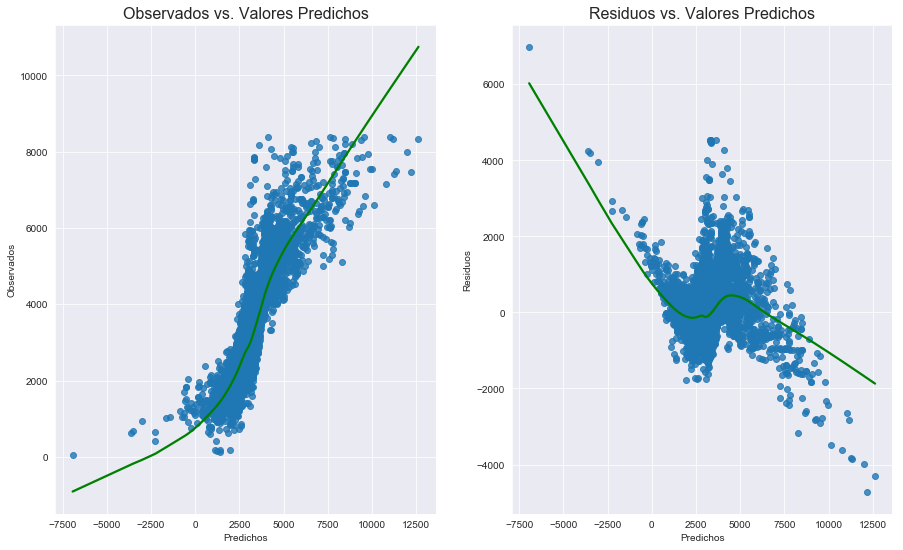

In [106]:
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'green'})
    ax[0].set_title('Observados vs. Valores Predichos', fontsize=16)
    ax[0].set(xlabel='Predichos', ylabel='Observados')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'green'})
    ax[1].set_title('Residuos vs. Valores Predichos', fontsize=16)
    ax[1].set(xlabel='Predichos', ylabel='Residuos')
    
linearity_test(lin_reg, y)    

##### Esperanza de los errores = 0

Este supuesto parecería estar cumpliéndose.

In [107]:
lin_reg.resid.mean()

4.780339302072203e-12

## Multicolinealidad

Las variables explicativas deben ser entre sí linealmente independientes. No deberíamos poder usar un modelo lineal para predecir con precisión una característica usando otra. Podría suceder que una variable sea una combinacion lineal de la otra, lo que viola la suposición.

En nuestro caso, tuvimos en cuenta también "la trampa" de las dummies (correlación perfecta entre las variables dummies y el término constante), dado que sólo generamos K-1 variables dummies para evitar violar el supuesto.

In [108]:
X_constant.shape

(12420, 65)

In [109]:
X.shape

(482, 68)

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
df_vif = pd.DataFrame({'vif': vif[1:]})
df_vif.sort_values(by='vif', ascending=False)

,vif
33,16.209541
14,12.661968
17,11.226984
42,8.249682
62,6.793883
...,...
61,1.041887
49,1.031495
2,1.025896
18,1.012821


Según un análisis muy rudimentario y preliminar, podríamos decir que las únicas variables que tienen un VIF alto serían las dummies de Barrio_Once, Barrio Norte y Almagro (estos últimos dos quizás ni siquiera habría que sacarlos, si tomáramos un valor umbral de 15). Sí podríamos estudiar sacando la dummy del barrio de Once, pero así y todo no parece ser tan grave el problema de multicolinealidad en este dataset.

In [111]:
print (X_constant.columns[33])
print (X_constant.columns[14])
print (X_constant.columns[11])

Barrio_Once
Barrio_Barrio Norte
Barrio_Almagro


## Supuesto de homocedasticidad (no heterocedasticidad) de los residuos

Necesitaríamos que residuos tengan una varianza constante para poder determinar con más precisión la verdadera desviación estándar de los errores de pronóstico y evitar recaer en intervalos de confianza para las predicciones fuera de muestra poco realistas.

Para investigar si los residuos presentan igual varianza, podemos observar el gráfico de los residuos (o residuos estandarizados) frente a los valores predichos como hicimos antes al chequear el supuesto de linealidad de los parámetros.

La gráfica muestra que claramente este modelo no cumple el supuesto. El valor de los residuos cambia en función del valor pronosticado. Se podría aplicar alguna fucion logaritmica sobre las variables predictoras o sobre la variable target para intentar solucionar esto.

También podemos usar dos pruebas estadísticas: Breusch-Pagan y Goldfeld-Quandt. En ambos, la hipótesis nula supone la homocedasticidad y un valor p por debajo de cierto nivel (como 0.05) indica que debemos rechazar el nulo a favor de la heterocedasticidad. Para los dos indicadores nos encontramos con pvalues extremos, lo cual nos lleva a rechazar la hipotesis nula de que había homocedasticidad, para afirmar que estamos frente a un problema de heterocedasticidad.


 Breusch-Pagan test ----
                                       value
Lagrange multiplier statistic   1.321393e+03
p-value                        3.881806e-234
f-value                         2.335075e+01
f p-value                      1.026890e-249

 Goldfeld-Quandt test ----
                value
F statistic  0.775078
p-value      1.000000

 Residuals plots ----


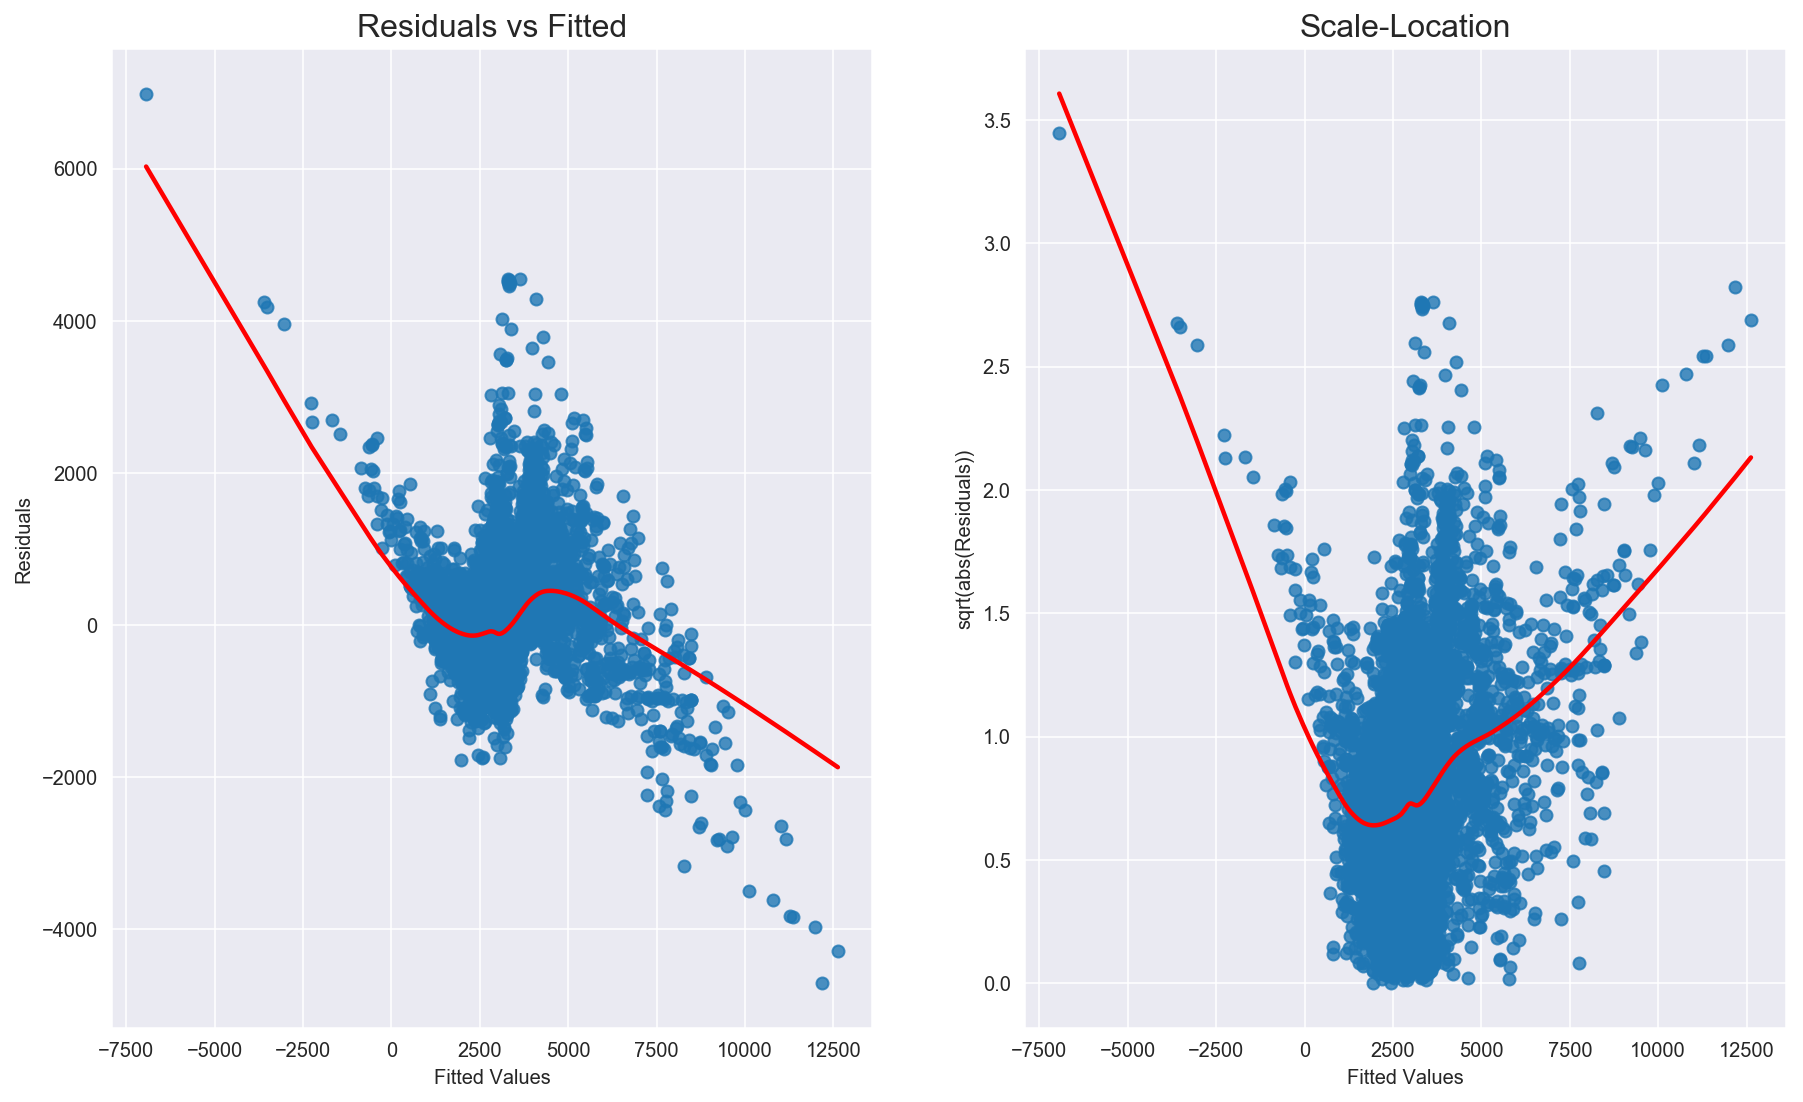

In [112]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lin_reg)

## No autocorrelación

Los residuos no deben tener correlación serial (estar autocorrelacionados con su serie rezagada). Al no estar trabajando con series de tiempo este supuesto no debería ser un problema para nuestro modelo.

Igualmente, podemos investigar autocorrelación viendo el gráfico ACF (función de autocorrelación) y el Durbin-Watson. En el primer caso, queremos ver si el valor de ACF es significativo para cualquier retraso (en caso de que no haya datos de series temporales, se utiliza el número de fila). Al llamar a la función, indicamos el nivel de significación en el que estamos interesados y el área crítica se traza en el gráfico. Las correlaciones significativas se encuentran fuera de esa área.

Como no estamos usando series de tiempo, las filas deben ordenarse de una manera que solo dependa de los valores de las características.

En cuanto a la prueba Durbin-Watson, el estadístico de prueba proporciona una prueba de autocorrelación residual significativa en el retraso 1. El estadistico de prueba siempre tiene un valor entre 0 y 4. El valor de 2 significa que no hay autocorrelación en la muestra. Valores <2 (como el nuestro, que dio 1.647) indican autocorrelación positiva, lo cual es llamativo ya que a priori no sería fácil de interpretar qué implica la presencia de autocorrelación.

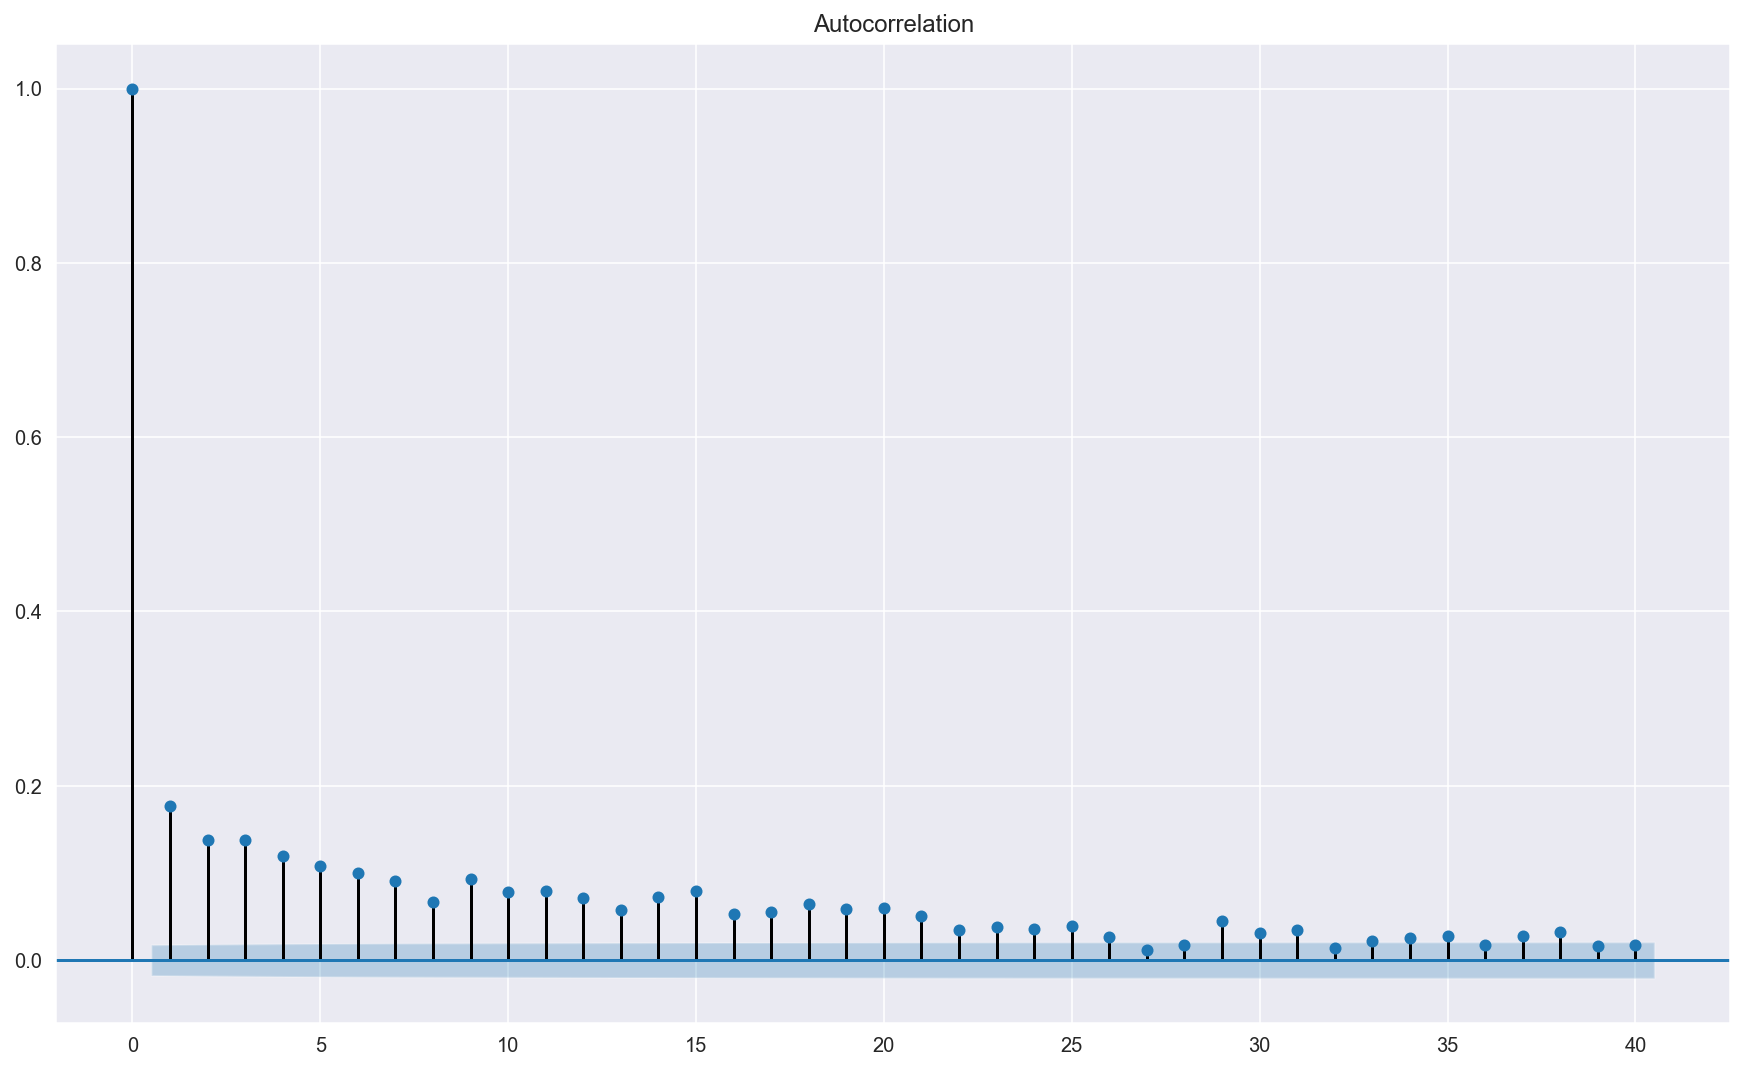

In [113]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

## Normalidad de los residuos

Cuando se viola este supuesto , puede causar problemas al calcular los intervalos de confianza y varias pruebas de significancia para los coeficientes. Cuando la distribución del error se aleja significativamente de la normal, los intervalos de confianza pueden ser demasiado amplios o demasiado estrechos.

Para estudiar la normalidad podemos ver el gráfico siguiente. Vemos un patrón de desviaciones en forma de s, lo cual implica una curtosis excesiva de los residuos: hay demasiados o dos pocos errores grandes en ambas direcciones.

Pruebas estadísticas como la prueba de Kolmogorov-Smirnov, la prueba de Shapiro-Wilk, la prueba de Jarque-Bera y la prueba de Anderson-Darling pueden ser utiles para evaluar este supuesto. Vemos que en las tres primeras los pvalues obtenidos nos llevan a rechazar el supuesto de normalidad.

Así, tanto el gráfico como los tests nos permiten inferir que los residuos no siguen la distribución normal.

Posibles soluciones:

transformación no lineal de la variable o características objetivo
eliminar / tratar posibles valores atípicos
Puede suceder que haya dos o más subconjuntos de datos que tengan propiedades estadísticas diferentes, en cuyo caso podrían considerarse modelos separados

Jarque-Bera test ---- statistic: 44086.3965, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9007, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.5622, p-value: 0.0000
Anderson-Darling test ---- statistic: 217.8931, 5% critical value: 0.7870
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


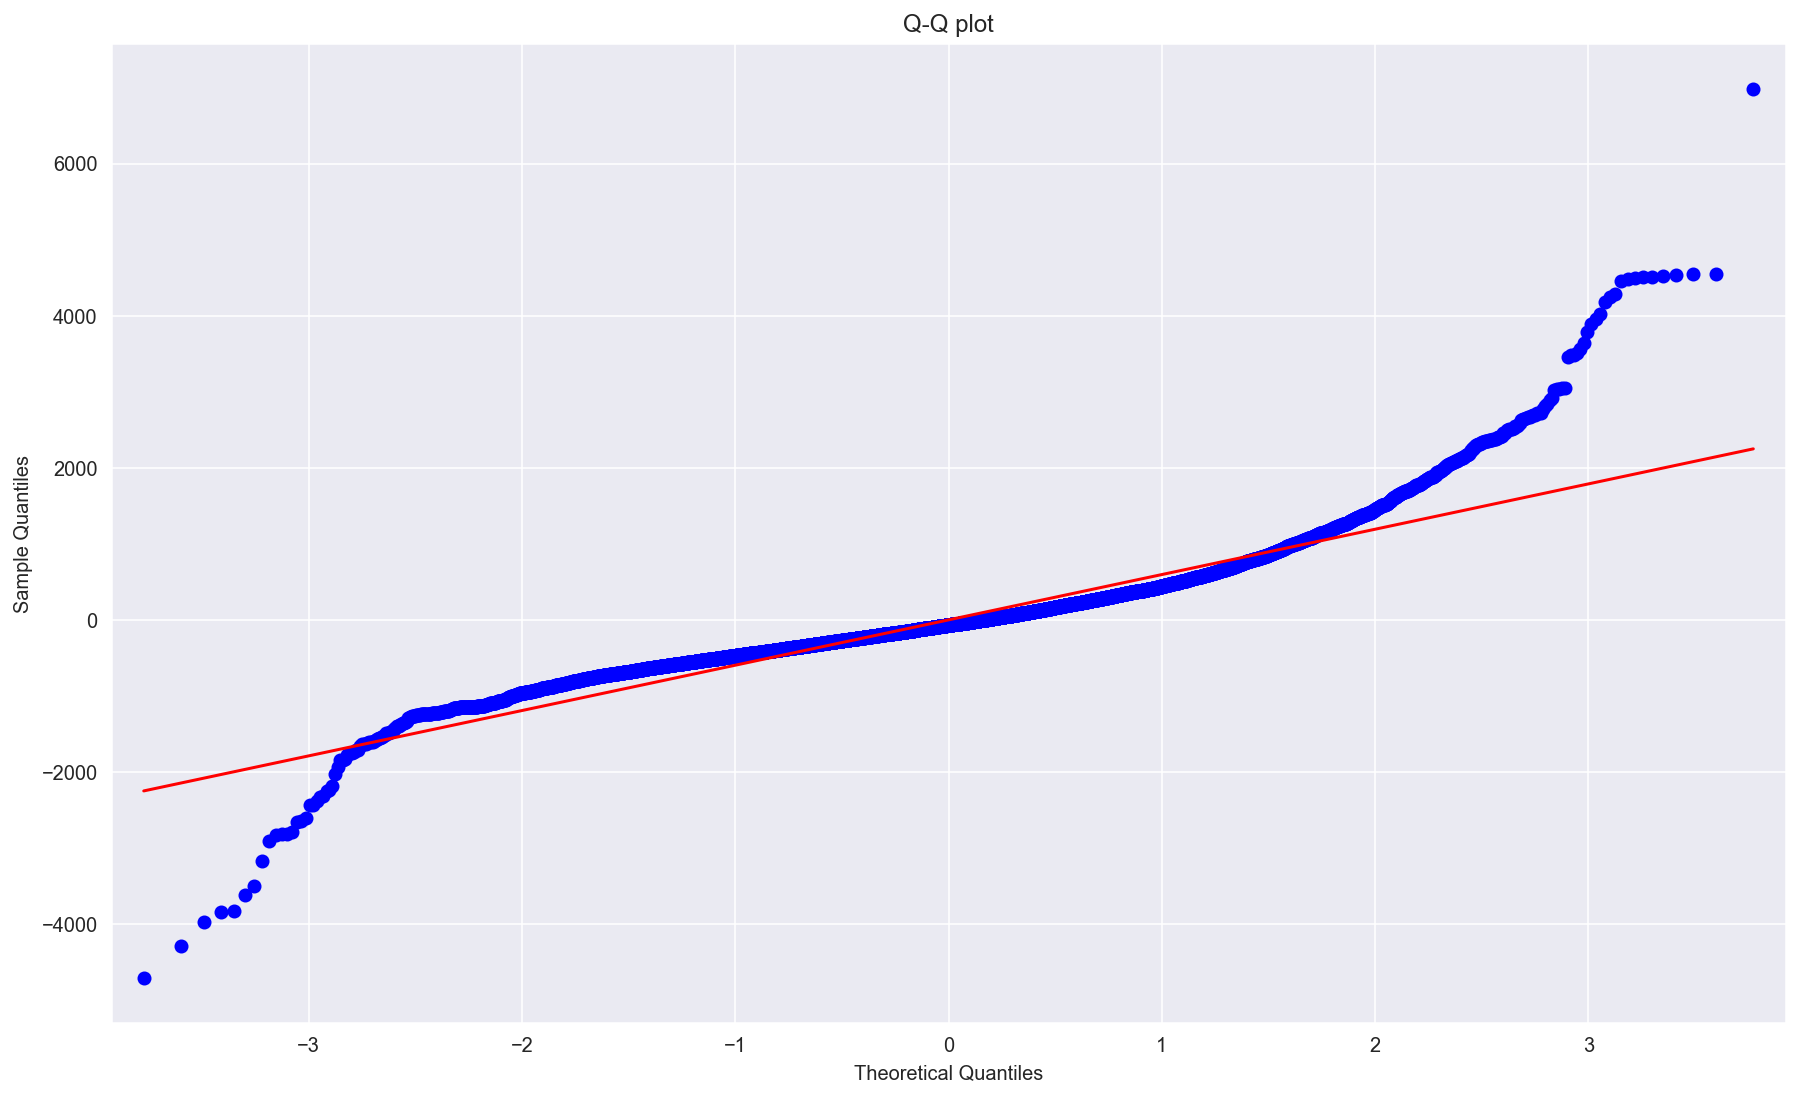

In [114]:
from scipy import stats

def normality_of_residuals_test(model):
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lin_reg)